In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import neighbors
from math import sqrt
import joblib

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import

import joblib
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hites\Downloads\Automobile_insurance_fraud.csv')

In [3]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [5]:
df.shape

(1000, 40)

In [6]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Observation:


    From the above observation there are "?" is present in collision_type,property_damage,police_report_available so we have to replace with np.NaN 

In [7]:
df=df.replace('?',np.NaN)

In [8]:
df.isin([' ','NA','-']).sum().any()

False

There is no whitespace , 'NA' or '-' are present in the dataset.

In [9]:
df.duplicated().sum()

0

Hence there is no duplicate value present in dataset.

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

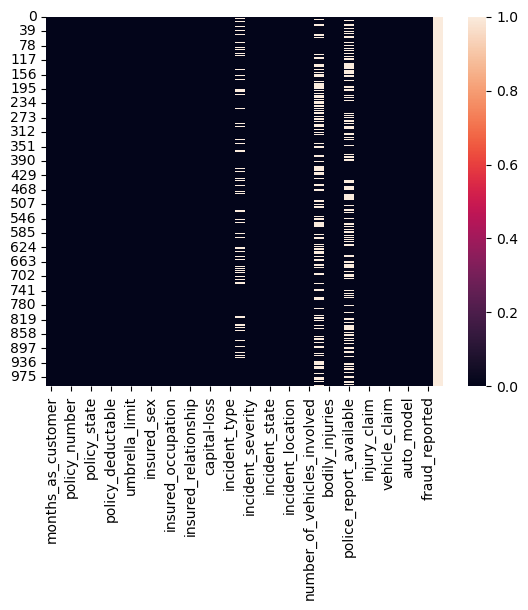

In [11]:
sns.heatmap(df.isnull())

Observation:


There are missing values present in   collision_type,property_damage,police_report_available,_c39. 

In _c39 all values are mising. So we can revome _c39 from the dataset.


In [12]:
#Value count for each coulmns

for i in df.columns:
    value_counts = df[i].value_counts()
    print(f"Value counts for {i}:\n{value_counts}\n")

Value counts for months_as_customer:
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

Value counts for age:
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

Value counts for policy_number:
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

Value counts for policy_bind_date:
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-

Observation:
    
collision_type,property_damage,police_report_availablea are categorical .so, in order to fill in the missing values , we will impute using mode. 

# Filling Missing values 

In [13]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [14]:
#Dropping Unnecessary columns

In [15]:
df.drop(['_c39'], axis=1, inplace= True)

In [16]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

So there is no missing values present in the dataset.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation:

As we can see in the observation, the summary includes list of all columns with their data types but policy_bind_date and incident_date are in object dtypes we have to convert into datetime dtypes.

The number of non-null values in each column. 

we also have the value of rangeindex provided for the index axis. 

In [18]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [19]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

In [20]:
# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

Our 'auto_year' column provides the year that the car was put into service. In short, the age of the automobile. Here, we'll use some basic feature engineering to produce new columns that reflect the age and drop-off time of the car.

Since 2015 is the incident year, we will create new columns using 2015 as the base year.

In [21]:
df['Automobile_Age'] = 2015 - df['auto_year']


In [22]:
df.drop("auto_year", axis=1, inplace=True)


In [64]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-06-09           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ...   auto_make auto_model fraud_reported policy_bind_day  \
0         466132  ...        Saab        92x              Y              17   
1         468176  ...    Mercedes       E400              Y              27   
2         430632  ...       Dodge        RAM              N               9   
3         608117  ...   Chevrolet      Tahoe              Y              25   
4         610706  ...      Accura        RSX              N               6   
..           ...  ...         ...        ...            ...             ...   
995       431289  ...       Honda     Accord              N              16   
996       608177  ...  Volkswagen     Passat              N               1   
997       442797  ...      Suburu    Impreza              N              17   
998       441714  ...        Audi         A5              N              18   
999       612260  ...    Mercedes       E400              N              11   

    policy_bind_month  policy_bind_year  incident_day incident_month  \
0                  10              2014            25              1   
1                   6              2006            21              1   
2                   6              2000            22              2   
3                   5              1990             1             10   
4                   6              2014            17              2   
..                ...               ...           ...            ...   
995                 7              1991            22              2   
996                 5              2014            24              1   
997                 2              2003            23              1   
998                11              2011            26              2   
999                11              1996            26              2   

    incident_year Automobile_Age  
0            2015             11  
1            2015              8  
2            2015              8  
3            2015              1  
4            2015              6  
..            ...            ...  
995          2015              9  
996          2015              0  
997          2015             19  
998

Regarding the Policy_csl column, some details:
Single-limit combined (CSL):
The combined total of the Property Damage Liability and Bodily Injury Liability coverage for each incident or accident is expressed as a single number, or CSL.


Numerical data divided by '/' in the Policy_csl columns of this dataset results in object datatype.
This column will be divided into two CSL columns, one for people and one for accidents.

In [23]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [24]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [25]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-06-09           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... fraud_reported policy_bind_day policy_bind_month  \
0          MALE  ...              Y              17                10   
1          MALE  ...              Y              27                 6   
2        FEMALE  ...              N               9                 6   
3        FEMALE  ...              Y              25                 5   
4          MALE  ...              N               6                 6   
..          ...  ...            ...             ...               ...   
995      FEMALE  ...              N              16                 7   
996      FEMALE  ...              N               1                 5   
997      FEMALE  ...              N              17                 2   
998        MALE  ...              N              18                11   
999      FEMALE  ...              N              11                11   

    policy_bind_year  incident_day  incident_month incident_year  \
0               2014            25               1          2015   
1               2006            21               1          2015   
2               2000            22               2          2015   
3               1990             1              10          2015   
4               2014            17               2          2015   
..               ...           ...             ...           ...   
995             1991            22               2          2015   
996             2014            24               1          2015   
997             2003            23               1          2015   
998             2011            26               2          2015   
999             1996            26               2          2015   

    Automobile_Age CSL_Personal CSL_Accidental  
0               11          250            500  
1                8          250            500  
2                8          100            300  
3                1          250            500  
4                6          500           1000  
..             ...          ...            ...  
995              9          500           1000  
996              0          100            300  
997     

In [26]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  injury_claim  \
count    1000.000000               1000.000000  ...   1000.000000   
mean   -26793.700000                 11.644000  ...   7433.420000   
std     28104.096686                  6.951373  ...   4880.951853   
min   -111100.000000                  0.000000  ...      0.000000   
25%    -51500.000000                  6.000000  ...   4295.000000   
50%    -23250.000000                 12.000000  ...   6775.000000   
75%         0.000000                 17.000000  ...  11305.000000   
max         0.000000                 23.000000  ...  21450.000000   

       property_claim  vehicle_claim  policy_bind_day  policy_bind_month  \
count     1000.000000    1000.000000      1000.000000        1000.000000   
mean      7399.570000   37928.950000        15.448000           6.559000   
std       4824.726179   18886.252893         8.850176           3.391758   
min          0.000000      70.000000         1.000000           1.000000   
25%       4445.000000   30292.500000         8.000000           4.000000   
50%       6750.000000   42100.000000        16.000000           7.000000   
75%      10885.000000   50822.500000        23.000000           9.000000   
max      23670.000000   79560.000000        31.000000          12.000000   

       policy_bind_year  incident_day  incident_month  incident_year  \
count       1000.000000    1000.00000     1000.000000         1000.0   
mean        2001.604000      13.08400        3.407000         2015.0   
std            7.360391      10.44318        3.276291            0.0   
min         1990.000000       1.00000        1.000000         2015.0   
25%         1995.000000       2.00000        1.000000         2015.0   
50%         2002.000000      15.00000        2.000000         2015.0   
75%         2008.000000      22.00000        5.000000         2015.0   
max         2015.000000      31.00000       12.000000         2015.0   

       Automobile_Age  
count     1000.000000  
mean         9.897000  
std          6.015861  
min          0.000000  
25%          5.000000  
50%         10.000000  
75%         15.000000  
max         20.000000  

[8 rows x 24 columns]


All count values are same in the data 1000.

months_as_customer: This column represents the average duration in months that the customers have been with the insurance company. The mean (average) duration is approximately 203.95 months.

age: This column indicates the average age of the customers. The mean age is approximately 38.95 years.min is 19 and maxmimun is 64.

policy_number: This is the policy number associated with the insurance policy. It seems to be a unique identifier for each policy.

policy_deductible: It represents the deductible amount for the insurance policy. The mean deductible is $1136.

policy_annual_premium: This column shows the average annual premium for the insurance policy. The mean premium is approximately $1256.41.

umbrella_limit: This is the limit of coverage provided by an umbrella insurance policy. The mean limit is $1,101,000.

There is chances of outliners in some coloumns we will treat it later.

In [27]:
categorial_col = []
for i in df.dtypes.index:
    if df.dtypes[i]  == "object":
        categorial_col.append(i)
print("Categorial Columns: " , categorial_col)  
print("\n")



numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: " , numerical_col)

Categorial Columns:  ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']


Numerical Columns:  ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_date', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'incident_year', 'Automobile_Age']


# Exploratory Data Analysis (EDA)

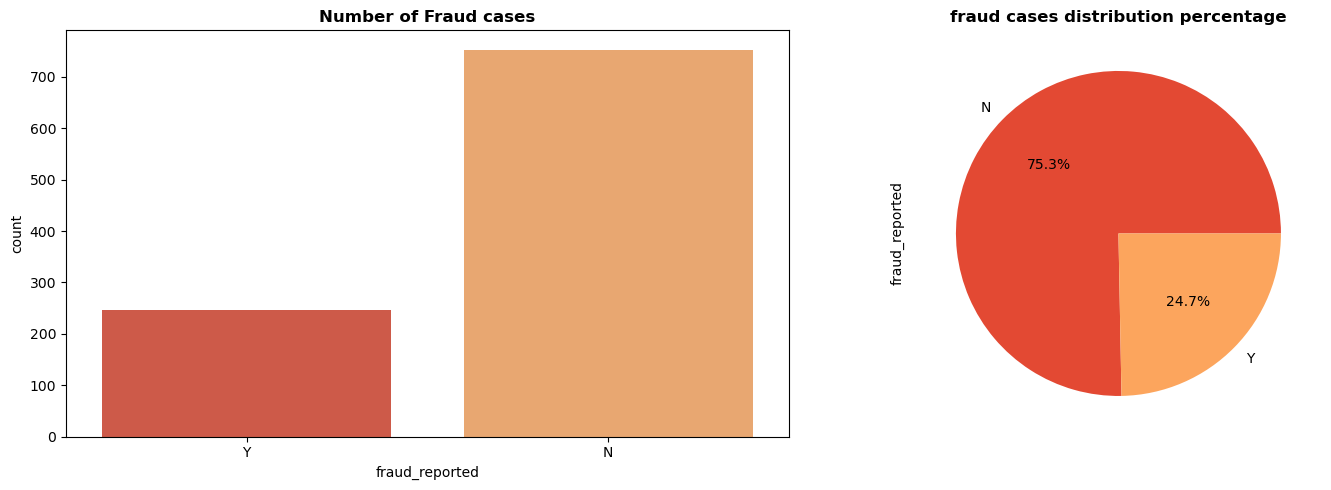

In [28]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('RdYlBu')


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='fraud_reported', data=df, ax=axes[0])
axes[0].set_title('Number of Fraud cases',fontweight = 'bold')

# Pie plot
df['fraud_reported'].value_counts().plot.pie( autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('fraud cases distribution percentage', fontweight = 'bold')

# Show the plots
plt.show()

Observation:
    
Around 24.7% of cases are fraud from overall cases.

"fraud_reported" is our target variable and dataset is imbalanced in nature.

# Insured Gender VS Fraud reported

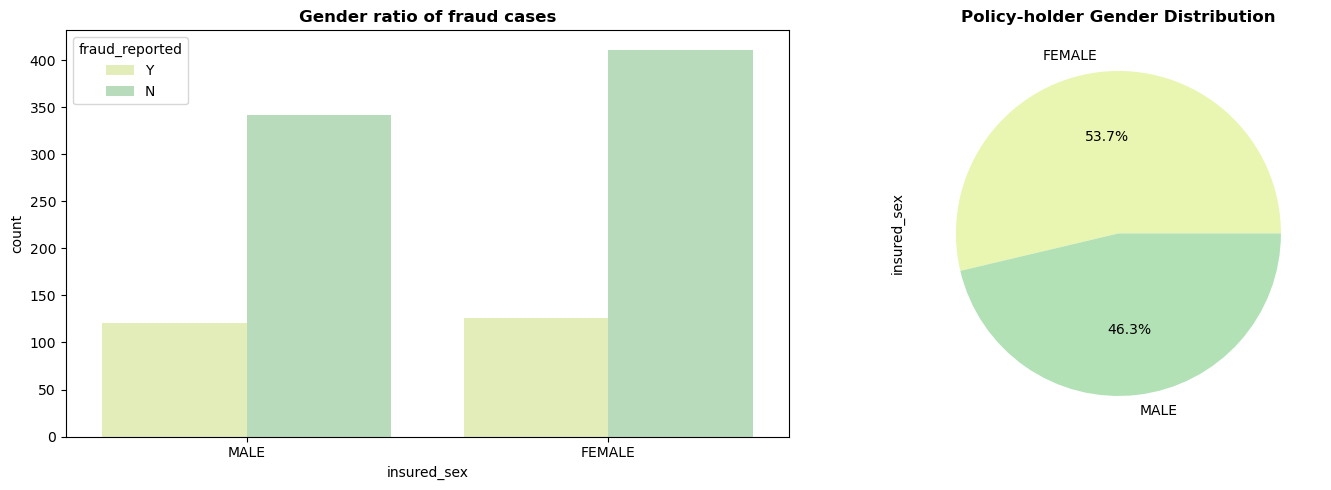

In [29]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('YlGnBu')


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='insured_sex', data=df,hue='fraud_reported',  ax=axes[0])
axes[0].set_title('Gender ratio of fraud cases',fontweight = 'bold')

# Pie plot
df['insured_sex'].value_counts().plot.pie( autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Policy-holder Gender Distribution', fontweight = 'bold')

# Show the plots
plt.show()

Observation:
    
    Number of female reported more claims as compare to them 53.7% of are fraud reported by female and 46.3 are by repoted by male.
    
    Almost the same number of fraud instances are committed by the same gender.

# insured education level vs fraud reported

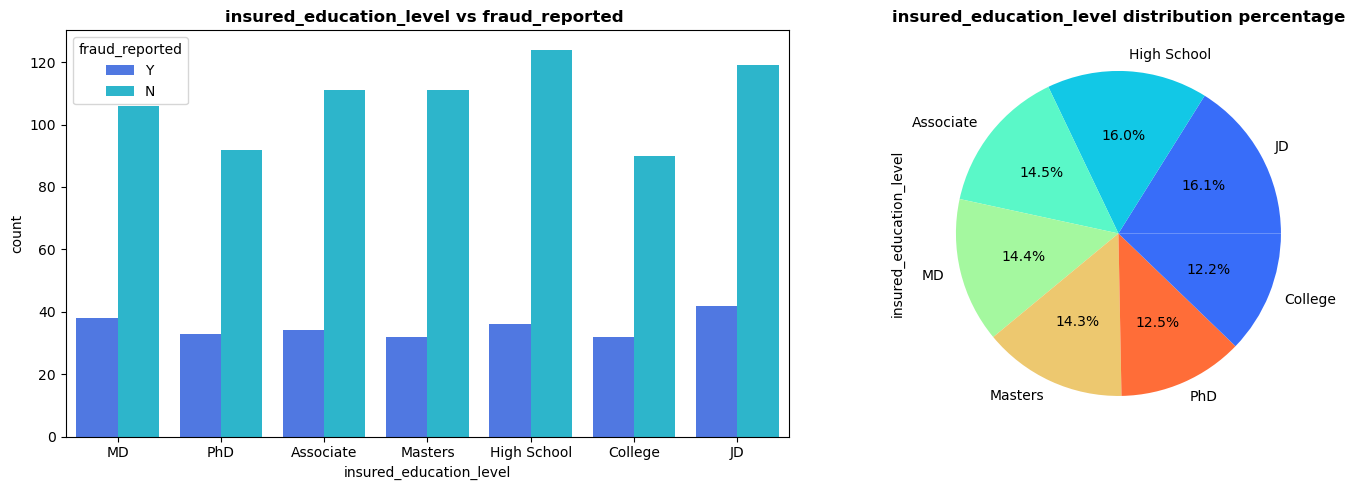

In [30]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('rainbow')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='insured_education_level', data=df, hue='fraud_reported', ax=axes[0])
axes[0].set_title('insured_education_level vs fraud_reported ', fontweight='bold')

# Pie plot
df['insured_education_level'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('insured_education_level distribution percentage', fontweight='bold')

# Show the plots
plt.show()

Observation:
    
    The propensity to allege fraud is seen in every educational background.JD is the most.

# Occupation of Insured Customers

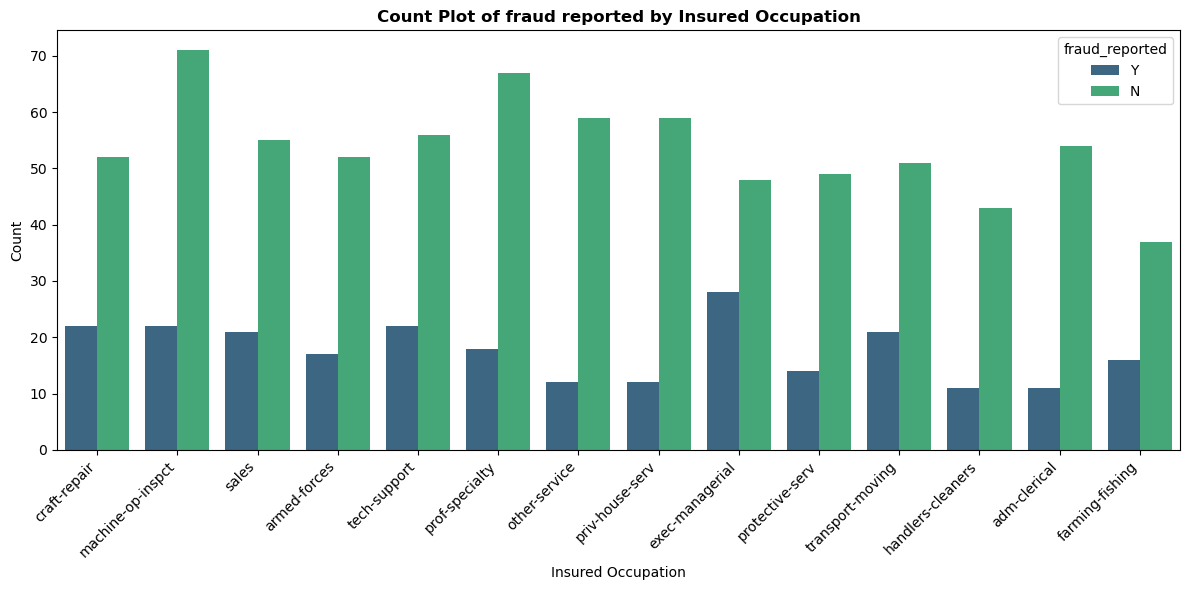

In [31]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('RdYlBu')

# Create a count plot for insured occupation
plt.figure(figsize=(12, 6))
sns.countplot(x='insured_occupation', data=df,hue='fraud_reported', palette='viridis')
plt.title('Count Plot of fraud reported by Insured Occupation', fontweight='bold')
plt.xlabel('Insured Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

# Show the plot
plt.show()

Observation:

The majority of the fraud reported by the executive-managments in  covered occupation.

# Hobbies of Insured Customers

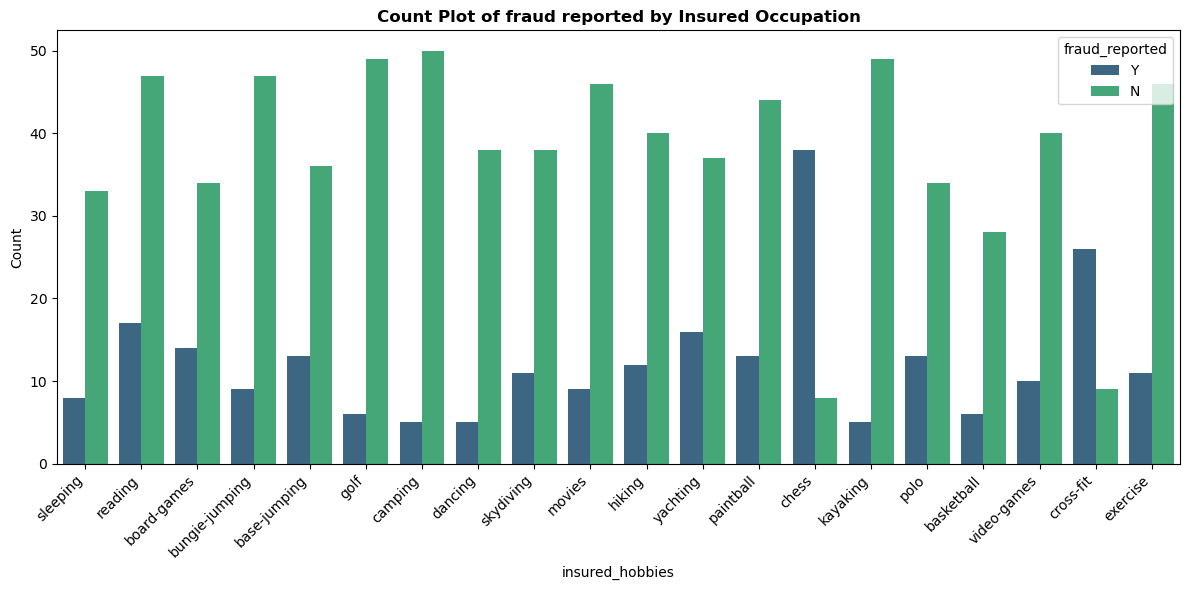

In [32]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('RdYlBu')

# Create a count plot for insured occupation
plt.figure(figsize=(12, 6))
sns.countplot(x='insured_hobbies', data=df, hue='fraud_reported', palette='viridis')
plt.title('Count Plot of fraud reported by Insured Occupation', fontweight='bold')
plt.xlabel('insured_hobbies')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

# Show the plot
plt.show()

Observation:
    
Chess enthusiasts reported higher levels of deception by themselves.

# Types of Incidents Vs Fraud cases

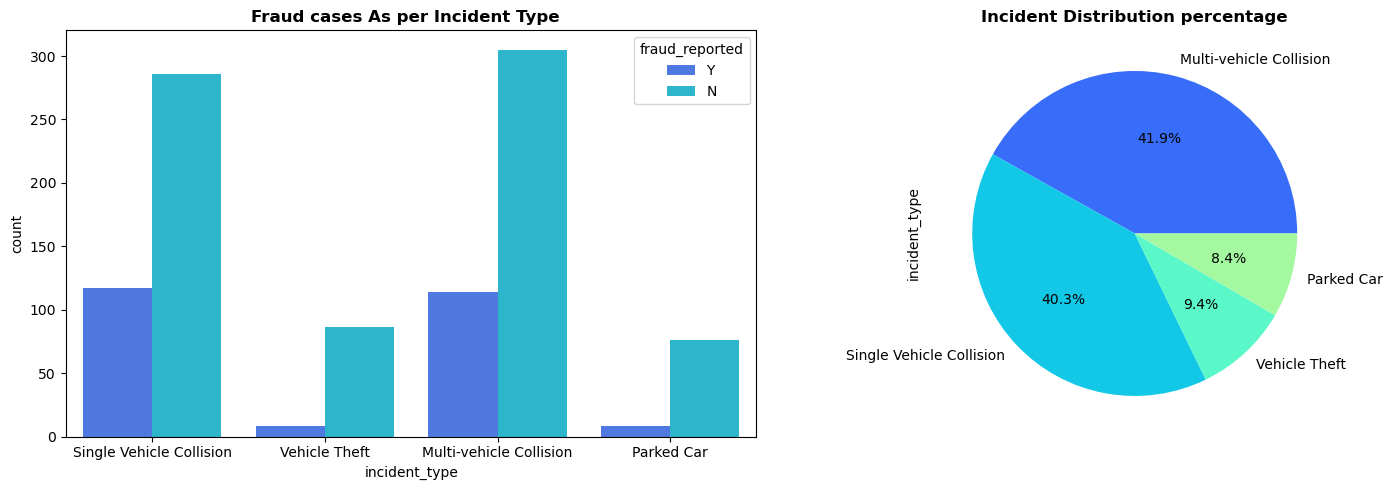

In [33]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('rainbow')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='incident_type', data=df,hue='fraud_reported', ax=axes[0])
axes[0].set_title('Fraud cases As per Incident Type  ', fontweight='bold')

# Pie plot
df['incident_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Incident Distribution percentage', fontweight='bold')

# Show the plots
plt.show()

Observation:

    
The majority of cases involve single and multiple vehicle collisions.

Car robberies are the cause of certain claims.

Fraud in a multi- or single-vehicle crash incidence is one of the three claims.


# Policy State Vs Fraud cases

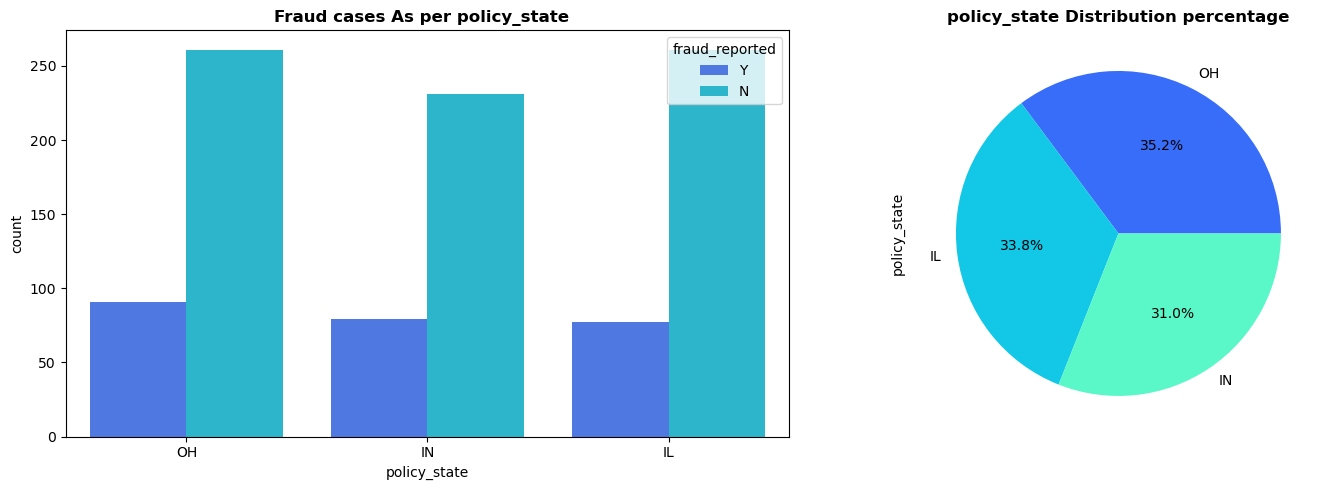

In [34]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('rainbow')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='policy_state', data=df,hue='fraud_reported', ax=axes[0])
axes[0].set_title('Fraud cases As per policy_state  ', fontweight='bold')

# Pie plot
df['policy_state'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('policy_state Distribution percentage', fontweight='bold')

# Show the plots
plt.show()

Observation:
    
    Each state contributes approximately the same number of instances.
The state of Ohio has the most fraud cases.

# Incident state vs fraud reported

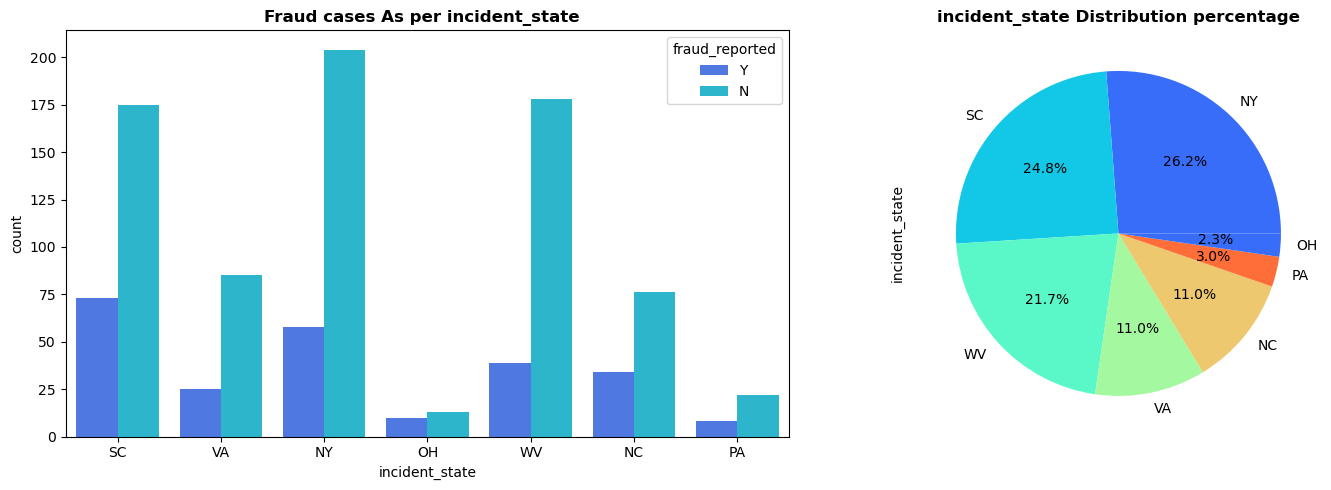

In [35]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('rainbow')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='incident_state', data=df,hue='fraud_reported', ax=axes[0])
axes[0].set_title('Fraud cases As per incident_state  ', fontweight='bold')

# Pie plot
df['incident_state'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('incident_state Distribution percentage', fontweight='bold')

# Show the plots
plt.show()

Observation:
    
Most of the fraud reported by the south carolina state along new york is on second number.

Most of the accident happend in New york 26.2% and SC is 24.8% out of total incidents.

PA reported least number of fraud cases.

The majority of fraud instances were reported by high accident states(NY and SC)


# Age vs Fraud

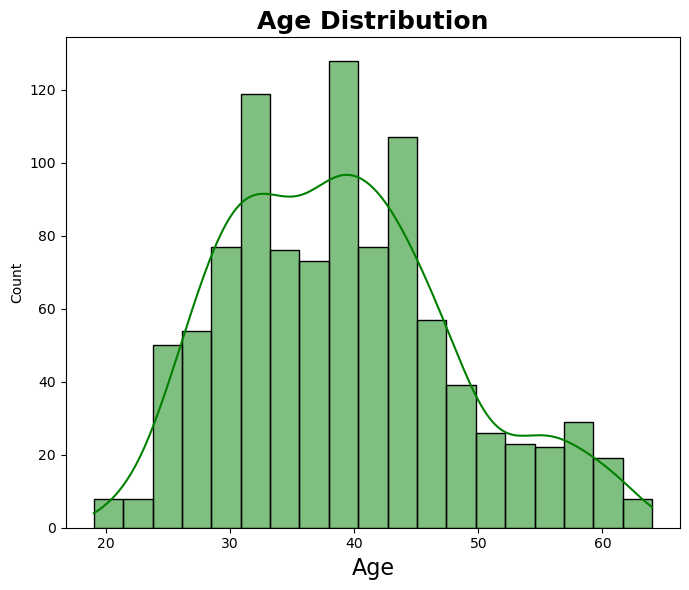

In [36]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='g')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [37]:
# Spliting age in different age range
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                    include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

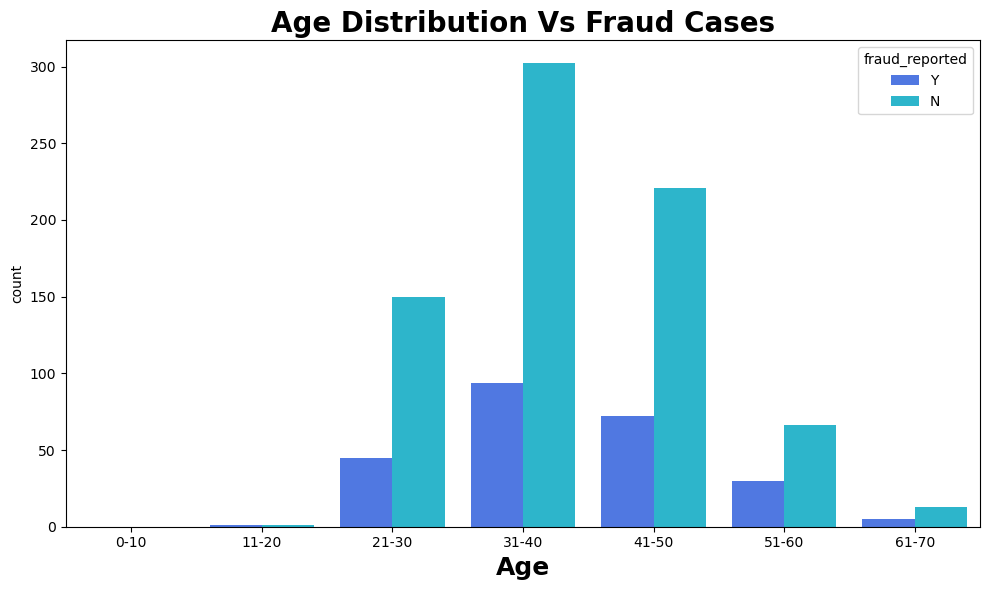

In [38]:
plt.figure(figsize=(10,6))  # Set the figure size
sns.countplot(x='age_bins', hue='fraud_reported', data=df)  
plt.xlabel('Age', fontsize=18, fontweight='bold')  
plt.title('Age Distribution Vs Fraud Cases', fontsize=20, fontweight='bold')  
plt.show() 

Observation:
    
   
The majority of fraud cases are committed by adults aged 31 to 50.

There have been very few occurrences among older people above the age of 60. 

# CSL_Policy vs Fraud Reported

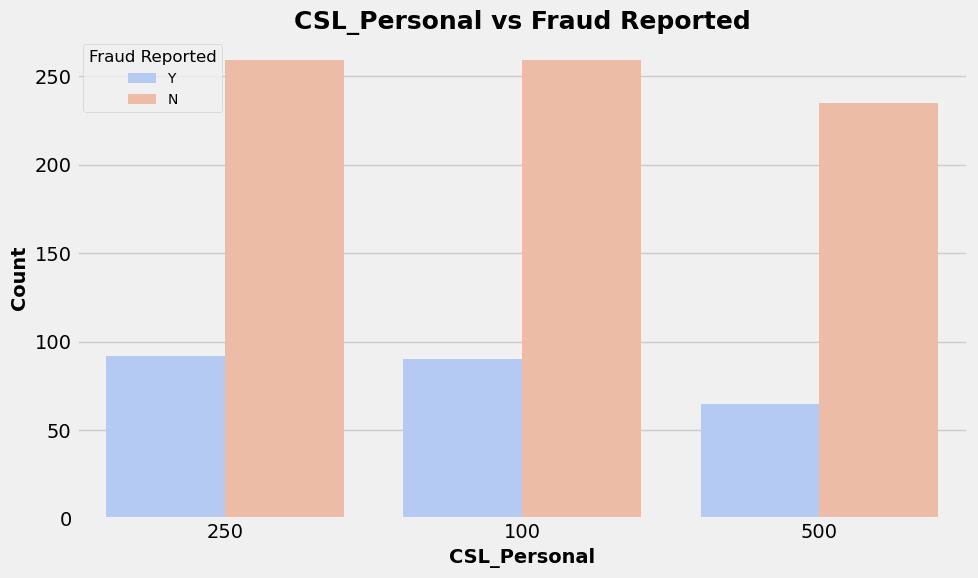

In [39]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)


sns.countplot(x='CSL_Personal', hue='fraud_reported', data=df, palette='coolwarm')
plt.title('CSL_Personal vs Fraud Reported', fontsize=18, fontweight='bold')
plt.xlabel('CSL_Personal', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Fraud Reported', title_fontsize='12', fontsize='10', loc='upper left')
plt.show()


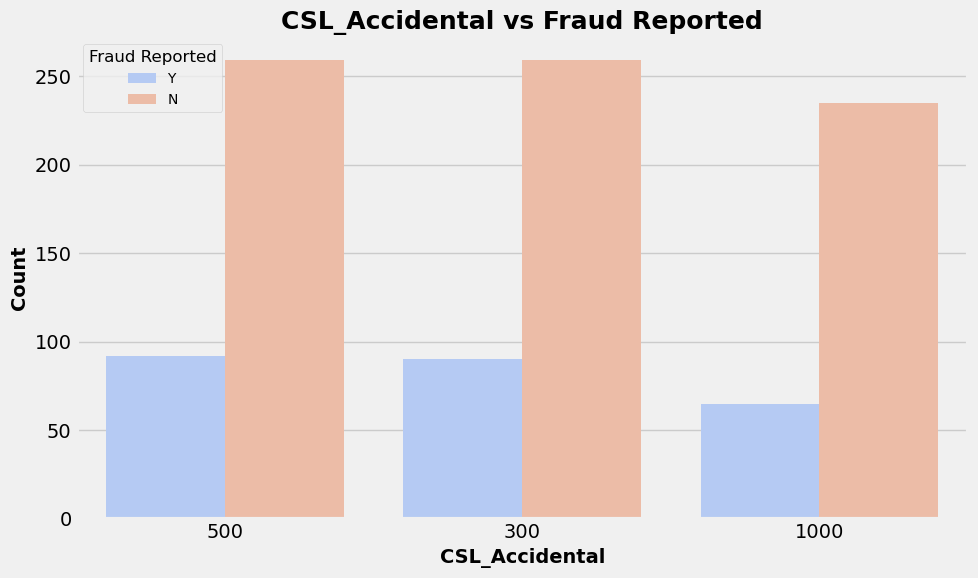

In [40]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)


sns.countplot(x='CSL_Accidental', hue='fraud_reported', data=df, palette='coolwarm')
plt.title('CSL_Accidental vs Fraud Reported', fontsize=18, fontweight='bold')
plt.xlabel('CSL_Accidental', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Fraud Reported', title_fontsize='12', fontsize='10', loc='upper left')
plt.show()

Observation: 
    
    Almost each CLS_policy group reported the same number of fraud cases either in personal or accidental. but most of cases occures in 250/500.

# Automobile Age vs fraud reported

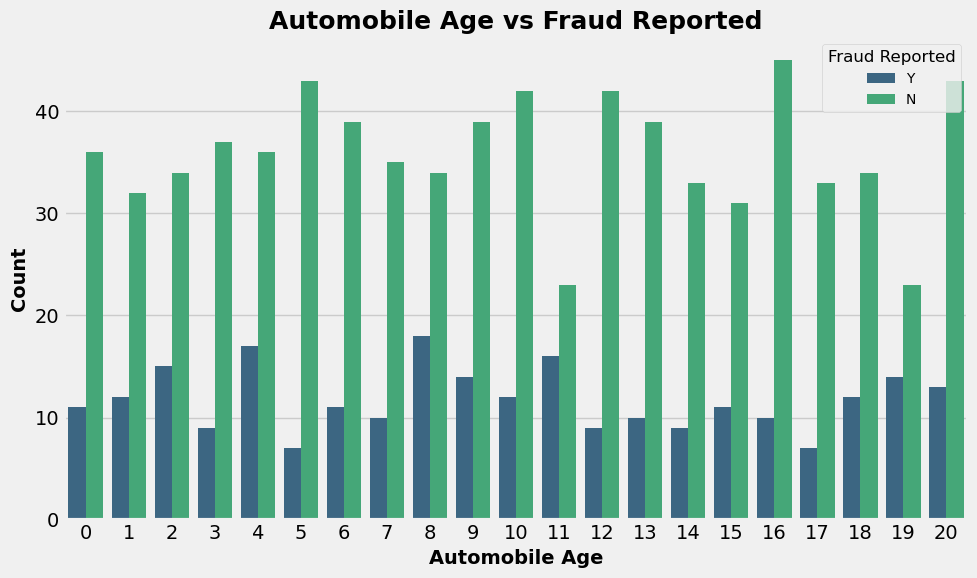

In [41]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

# Assuming 'Automobile_Age' and 'fraud_reported' are the column names in your DataFrame
sns.countplot(x='Automobile_Age', hue='fraud_reported', data=df, palette='viridis')
plt.title('Automobile Age vs Fraud Reported', fontsize=18, fontweight='bold')
plt.xlabel('Automobile Age', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Fraud Reported', title_fontsize='12', fontsize='10', loc='upper right')
plt.show()

# collision type vs fraud reported

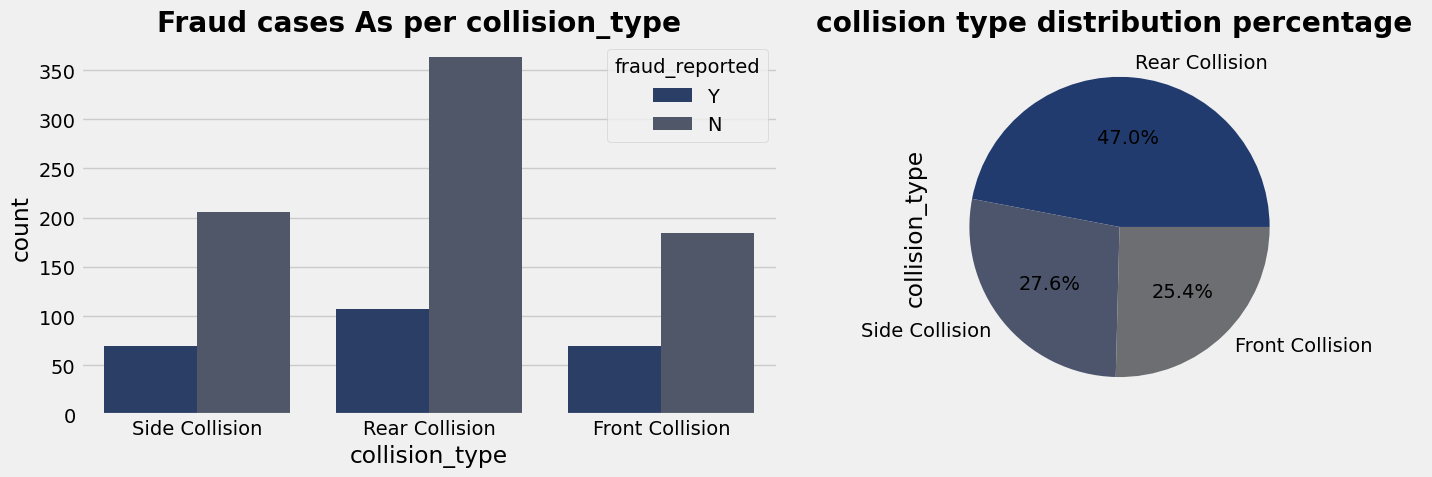

In [42]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('cividis')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
sns.countplot(x='collision_type', data=df,hue='fraud_reported', ax=axes[0])
axes[0].set_title('Fraud cases As per collision_type  ', fontweight='bold')

# Pie plot
df['collision_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('collision type distribution percentage ', fontweight='bold')

# Show the plots
plt.show()

Observation:
    
Majority of the cases of fraud reported  with rear collision.



# Incident type vs collision type

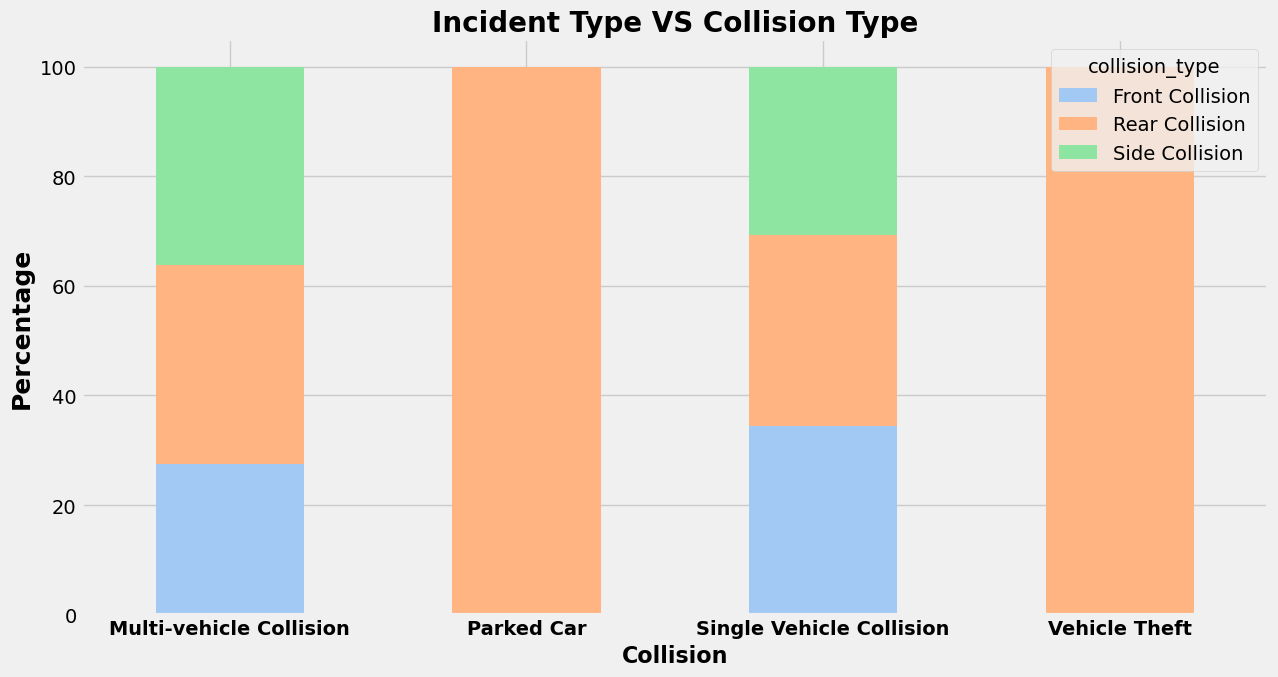

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 7)
sns.set_palette('pastel')

table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1), axis=0) * 100).plot(kind='bar', stacked=True)

plt.title('Incident Type VS Collision Type', fontsize=20, fontweight='bold')
plt.ylabel('Percentage', fontsize=18, fontweight='bold')
plt.xlabel('Collision', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, rotation=0, fontweight='bold')
plt.show()

Most of the collsion are rear either for vehical theft or parked car.



# Incident Severity vs Collision Type


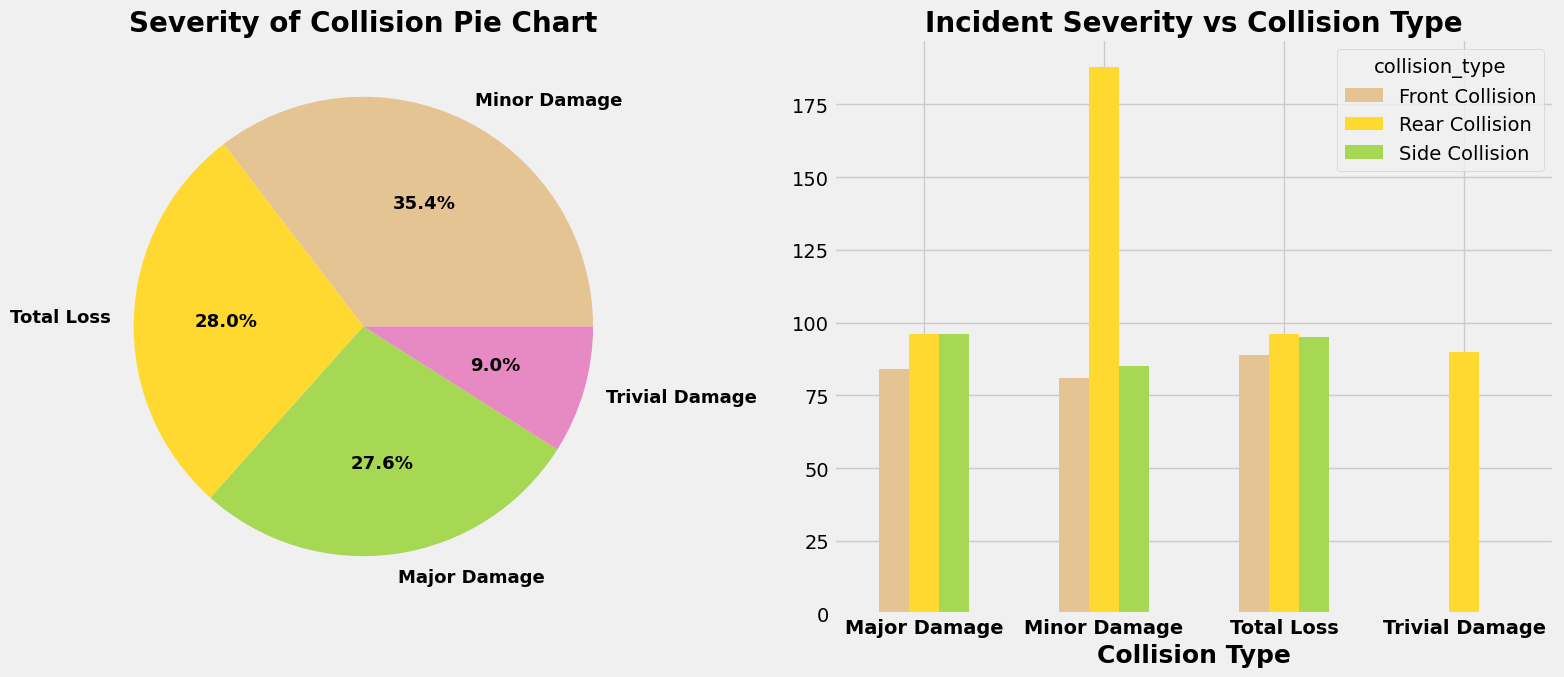

In [44]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Pie chart for distribution of incident severity
df['incident_severity'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontweight': 'bold', 'fontsize': 13},ax=ax[0])
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Bar plot for incident severity vs collision type
table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind='bar', ax=ax[1])

ax[1].set_title('Incident Severity vs Collision Type', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Collision Type", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)

plt.tight_layout()
plt.show()


# Collision Type vs Incident Severity

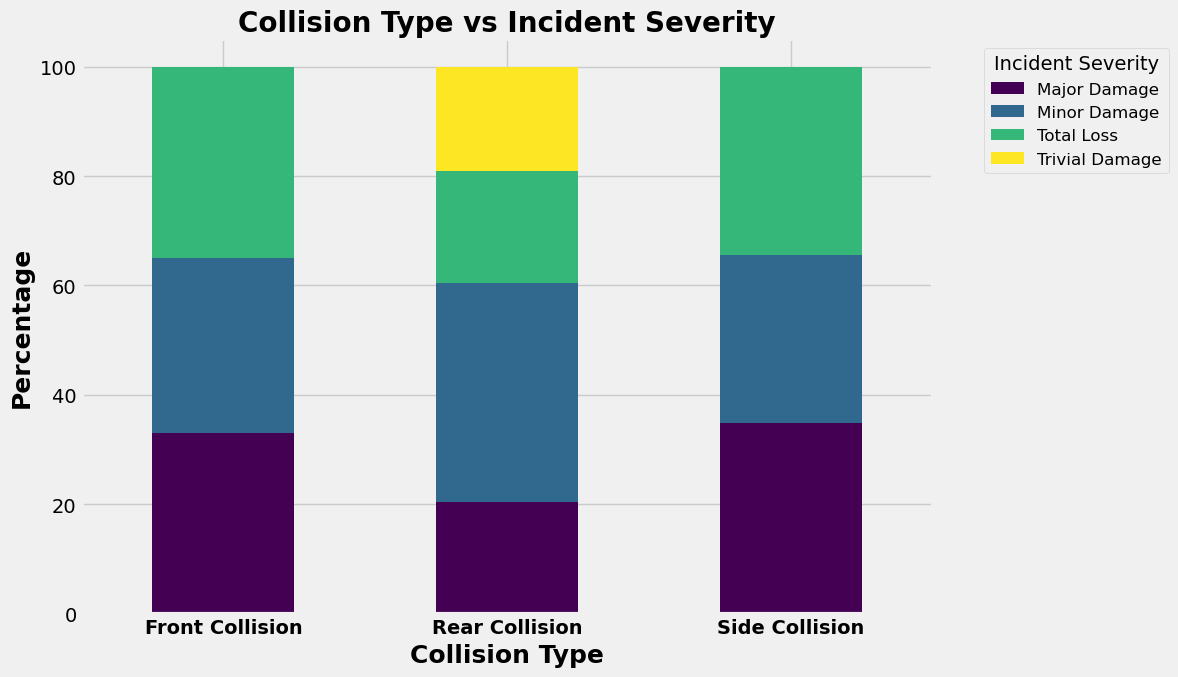

In [45]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')

# Create a stacked bar plot for Collision VS Incident Severity
table = pd.crosstab(df['collision_type'], df['incident_severity'])
(table.div(table.sum(axis=1), axis=0) * 100).plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Collision Type vs Incident Severity', fontsize=20, fontweight='bold')
plt.xlabel('Collision Type', fontsize=18, fontweight='bold')
plt.ylabel('Percentage', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)
plt.legend(title='Incident Severity', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


As we can observe that about 70-100%total loss in front collision and side collision

80-100 % trivial damage in rear collision.





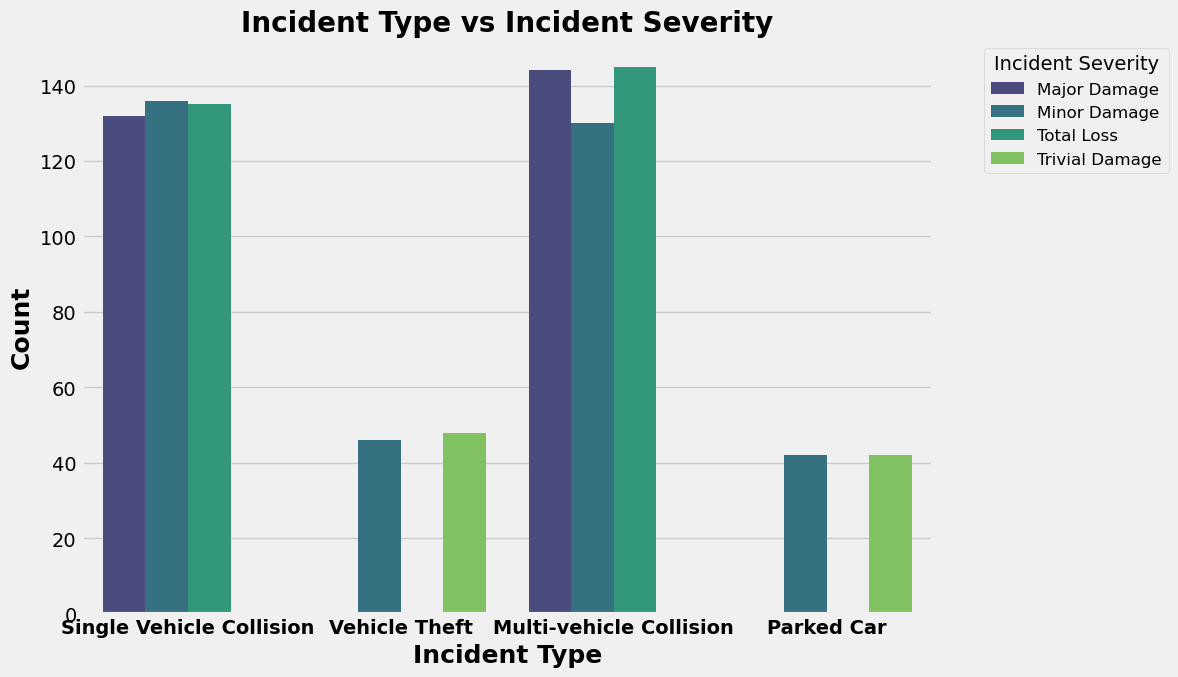

In [46]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')

# Create a count plot for Incident Type VS Severity
plt.figure(figsize=(12, 7))
sns.countplot(x='incident_type', hue='incident_severity', data=df, palette='viridis')
plt.title('Incident Type vs Incident Severity', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=18, fontweight='bold')
plt.ylabel('Count', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)
plt.legend(title='Incident Severity', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# Incident Type vs Vehicle Claim


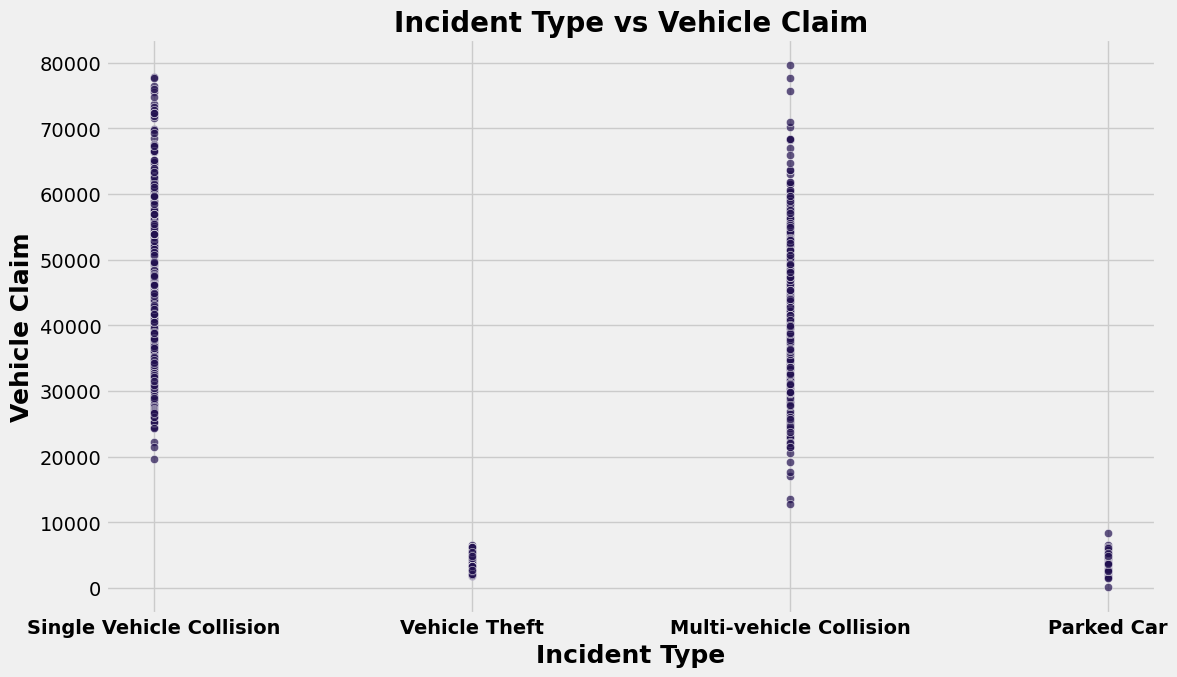

In [47]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('magma')

# Create a scatter plot for Incident Type vs Vehicle Claim
plt.figure(figsize=(12, 7))
sns.scatterplot(x='incident_type', y='vehicle_claim', data=df, palette='viridis', alpha=0.7)
plt.title('Incident Type vs Vehicle Claim', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=18, fontweight='bold')
plt.ylabel('Vehicle Claim', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


Single and multi vehicle collision claims most.

# Property Damage vs Property Claim

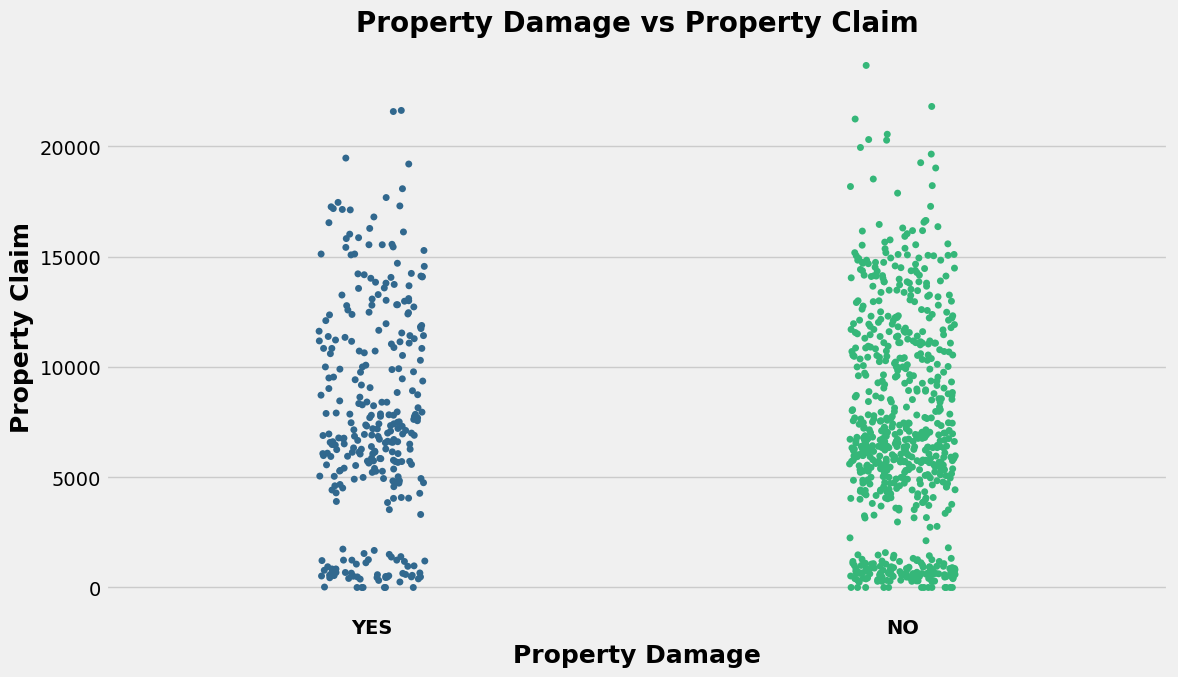

In [48]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')

# Create a box plot for Property Damage vs Property Claim
plt.figure(figsize=(12, 7))
sns.stripplot(x='property_damage', y='property_claim', data=df, palette='viridis')
plt.title('Property Damage vs Property Claim', fontsize=20, fontweight='bold')
plt.xlabel('Property Damage', fontsize=18, fontweight='bold')
plt.ylabel('Property Claim', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


# Total Claim Amount vs incident_state

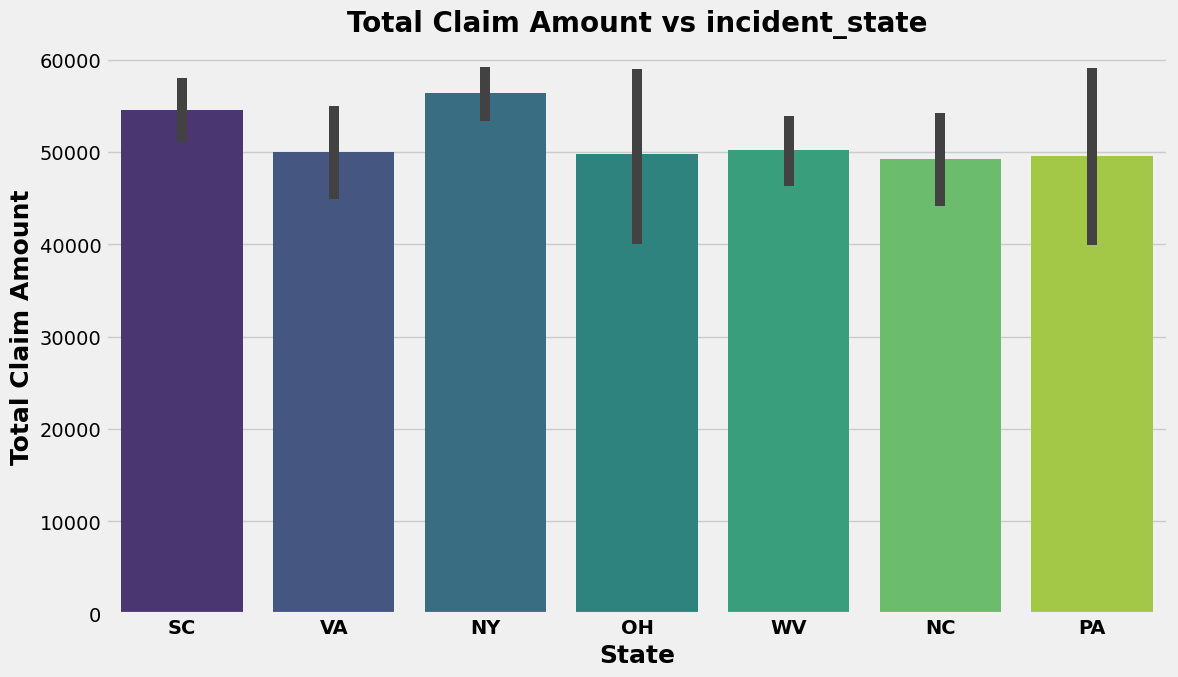

In [49]:
plt.figure(figsize=(12, 7))
sns.barplot(x='incident_state', y='total_claim_amount', data=df, palette='viridis')
plt.title('Total Claim Amount vs incident_state', fontsize=20, fontweight='bold')
plt.xlabel('State', fontsize=18, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold', rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


Almost each state claim same. Most of the  total claim amounts claims in New York state(NY) 55-60k$

# Total Claim Amount in Different State 

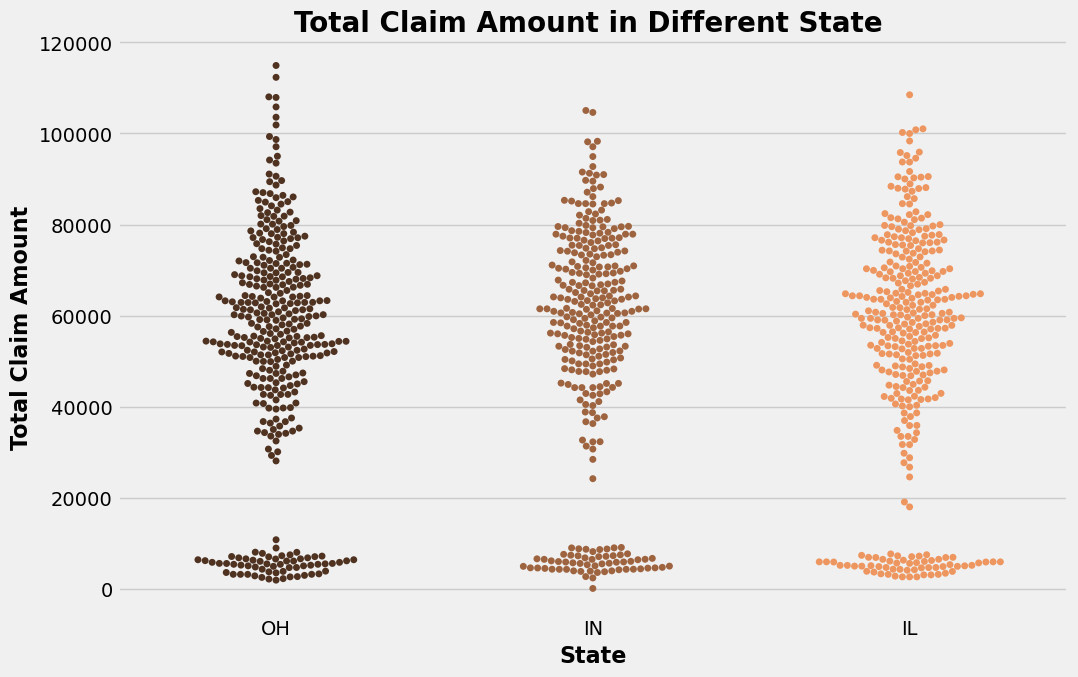

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 7)
sns.swarmplot(x='policy_state', y='total_claim_amount', data=df, palette='copper')
plt.title('Total Claim Amount in Different State ', fontsize=20, fontweight='bold')
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16, fontweight='bold')
plt.show()


# Vehicle Claim Amount for different Automobile Makers

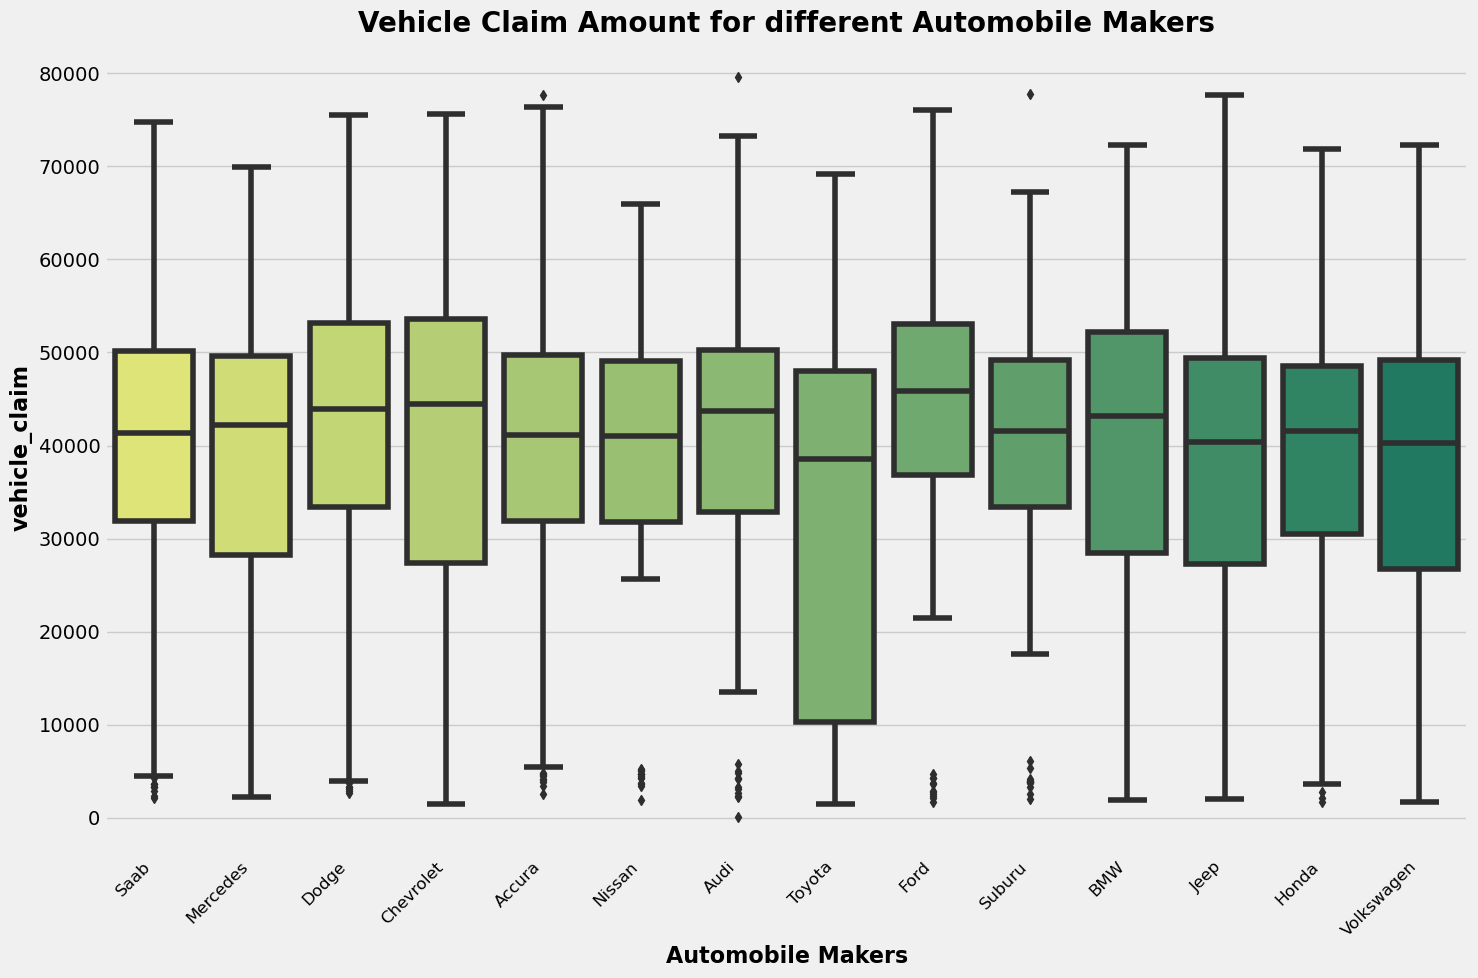

In [51]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,10)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('vehicle_claim', fontsize=16,fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

# Total Claim Amount VS Annual Premium

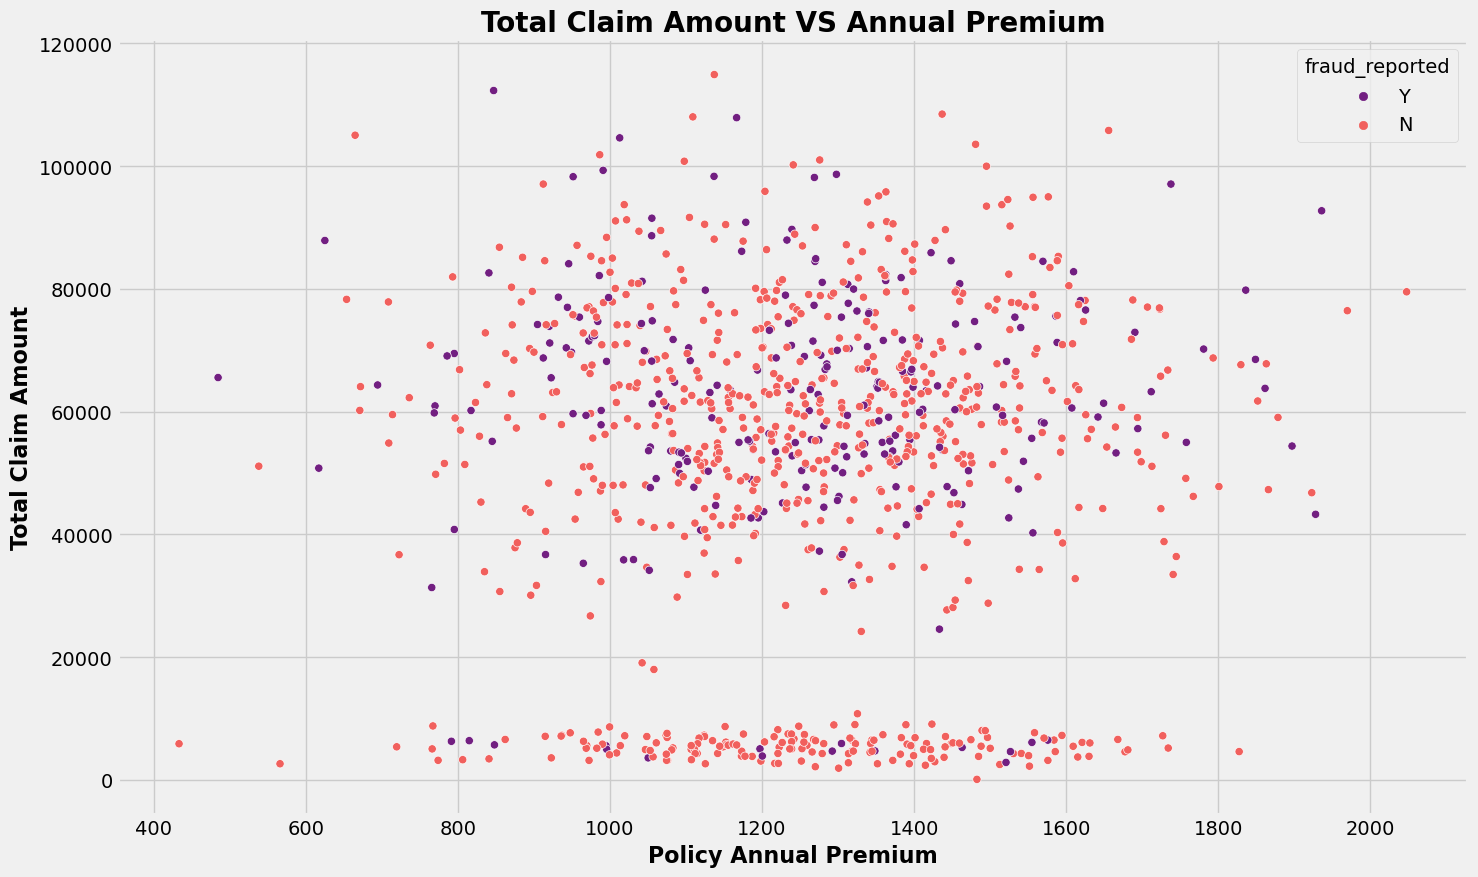

In [52]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'magma')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

Most of the total claim between 40000-80000 with policy annual premium of between 800-1600 are repoted by fraud.

# Incident Severity vs Total Claim Amount

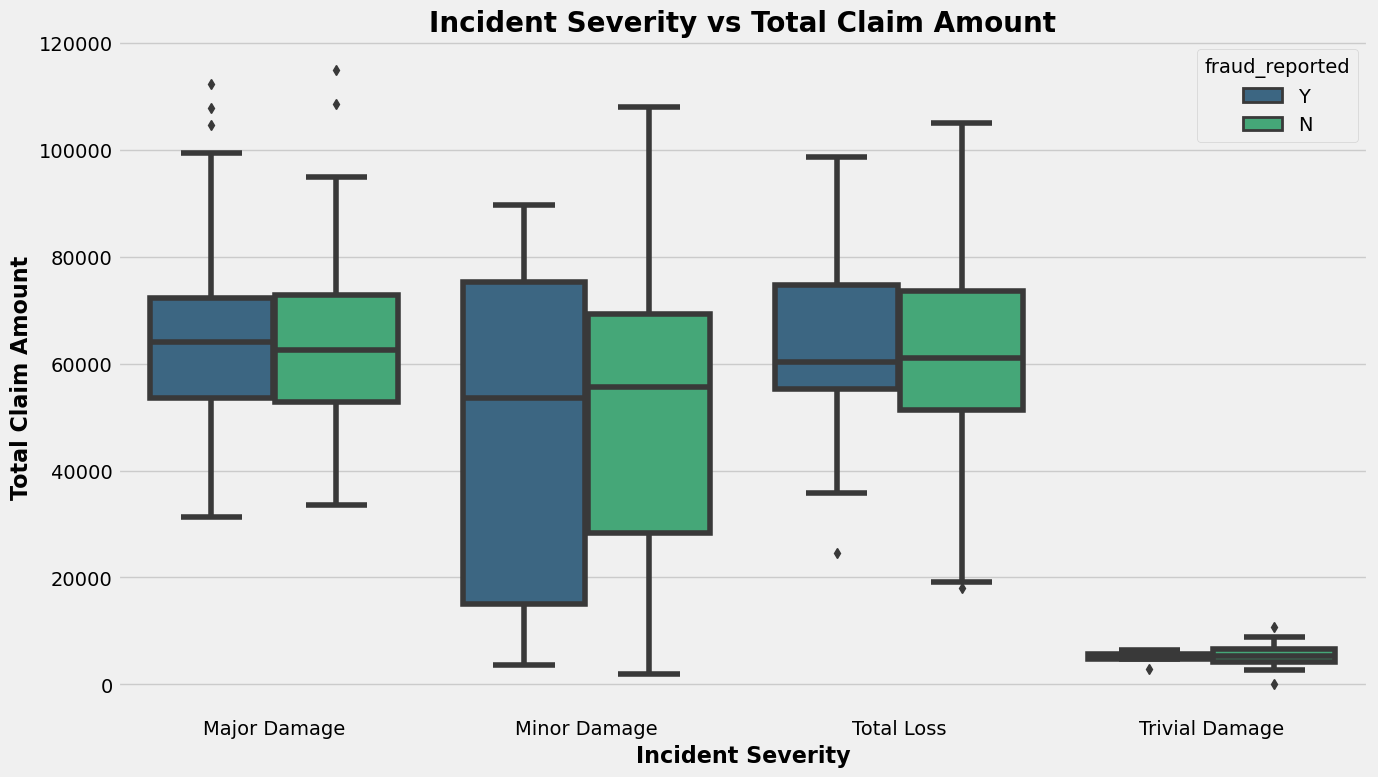

In [53]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (14, 8)
sns.boxplot(x='incident_severity', y='total_claim_amount', hue='fraud_reported', data=df, palette='viridis')
plt.title('Incident Severity vs Total Claim Amount', fontsize=20, fontweight='bold')
plt.xlabel('Incident Severity', fontsize=16, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16, fontweight='bold')
plt.show()


In [54]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-06-09           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... policy_bind_day policy_bind_month policy_bind_year  \
0          MALE  ...              17                10             2014   
1          MALE  ...              27                 6             2006   
2        FEMALE  ...               9                 6             2000   
3        FEMALE  ...              25                 5             1990   
4          MALE  ...               6                 6             2014   
..          ...  ...             ...               ...              ...   
995      FEMALE  ...              16                 7             1991   
996      FEMALE  ...               1                 5             2014   
997      FEMALE  ...              17                 2             2003   
998        MALE  ...              18                11             2011   
999      FEMALE  ...              11                11             1996   

    incident_day  incident_month  incident_year Automobile_Age CSL_Personal  \
0             25               1           2015             11          250   
1             21               1           2015              8          250   
2             22               2           2015              8          100   
3              1              10           2015              1          250   
4             17               2           2015              6          500   
..           ...             ...            ...            ...          ...   
995           22               2           2015              9          500   
996           24               1           2015              0          100   
997           23               1           2015             19          250   
998           26               2           2015             17          500   
999           26               2           2015              8          250   

    CSL_Accidental age_bins  
0              500    41-50  
1              500    41-50  
2              300    21-30  
3              500    41-50  
4             1000    41-50  
..             ...      ...  
995           1000    31-40  
996            300    41-50  
997            500    3

# Dropping Unnessesary Columns 

In [55]:
df.drop(['age_bins','incident_location','insured_zip','policy_number','incident_year','policy_bind_date'],axis=1, inplace=True)


In [56]:
df.drop(['incident_date'],axis=1, inplace=True)

# Encoding categorical data

In [57]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [58]:
# Using Label Encoder for categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   auto_model  fraud_reported  policy_bind_day  policy_bind_month  \
0           1               1               17                 10   
1          12               1               27                  6   
2          30               0                9                  6   
3          34               1               25                  5   
4          31               0                6                  6   

   policy_bind_year  incident_day  incident_month  Automobile_Age  \
0              2014            25               1              11   
1              2006            21               1               8   
2              2000            22               2               8   
3              1990             1              10               1   
4              2014            17               2               6   

   CSL_Personal  CSL_Accidental  
0             1               2  
1             1               2  
2             0               1  
3             1               2  
4             2               0  

[5 rows x 40 columns]

# Feature selection and Engineering

 Outliers Detection and Removal

In [59]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [60]:
len(Numerical)

21

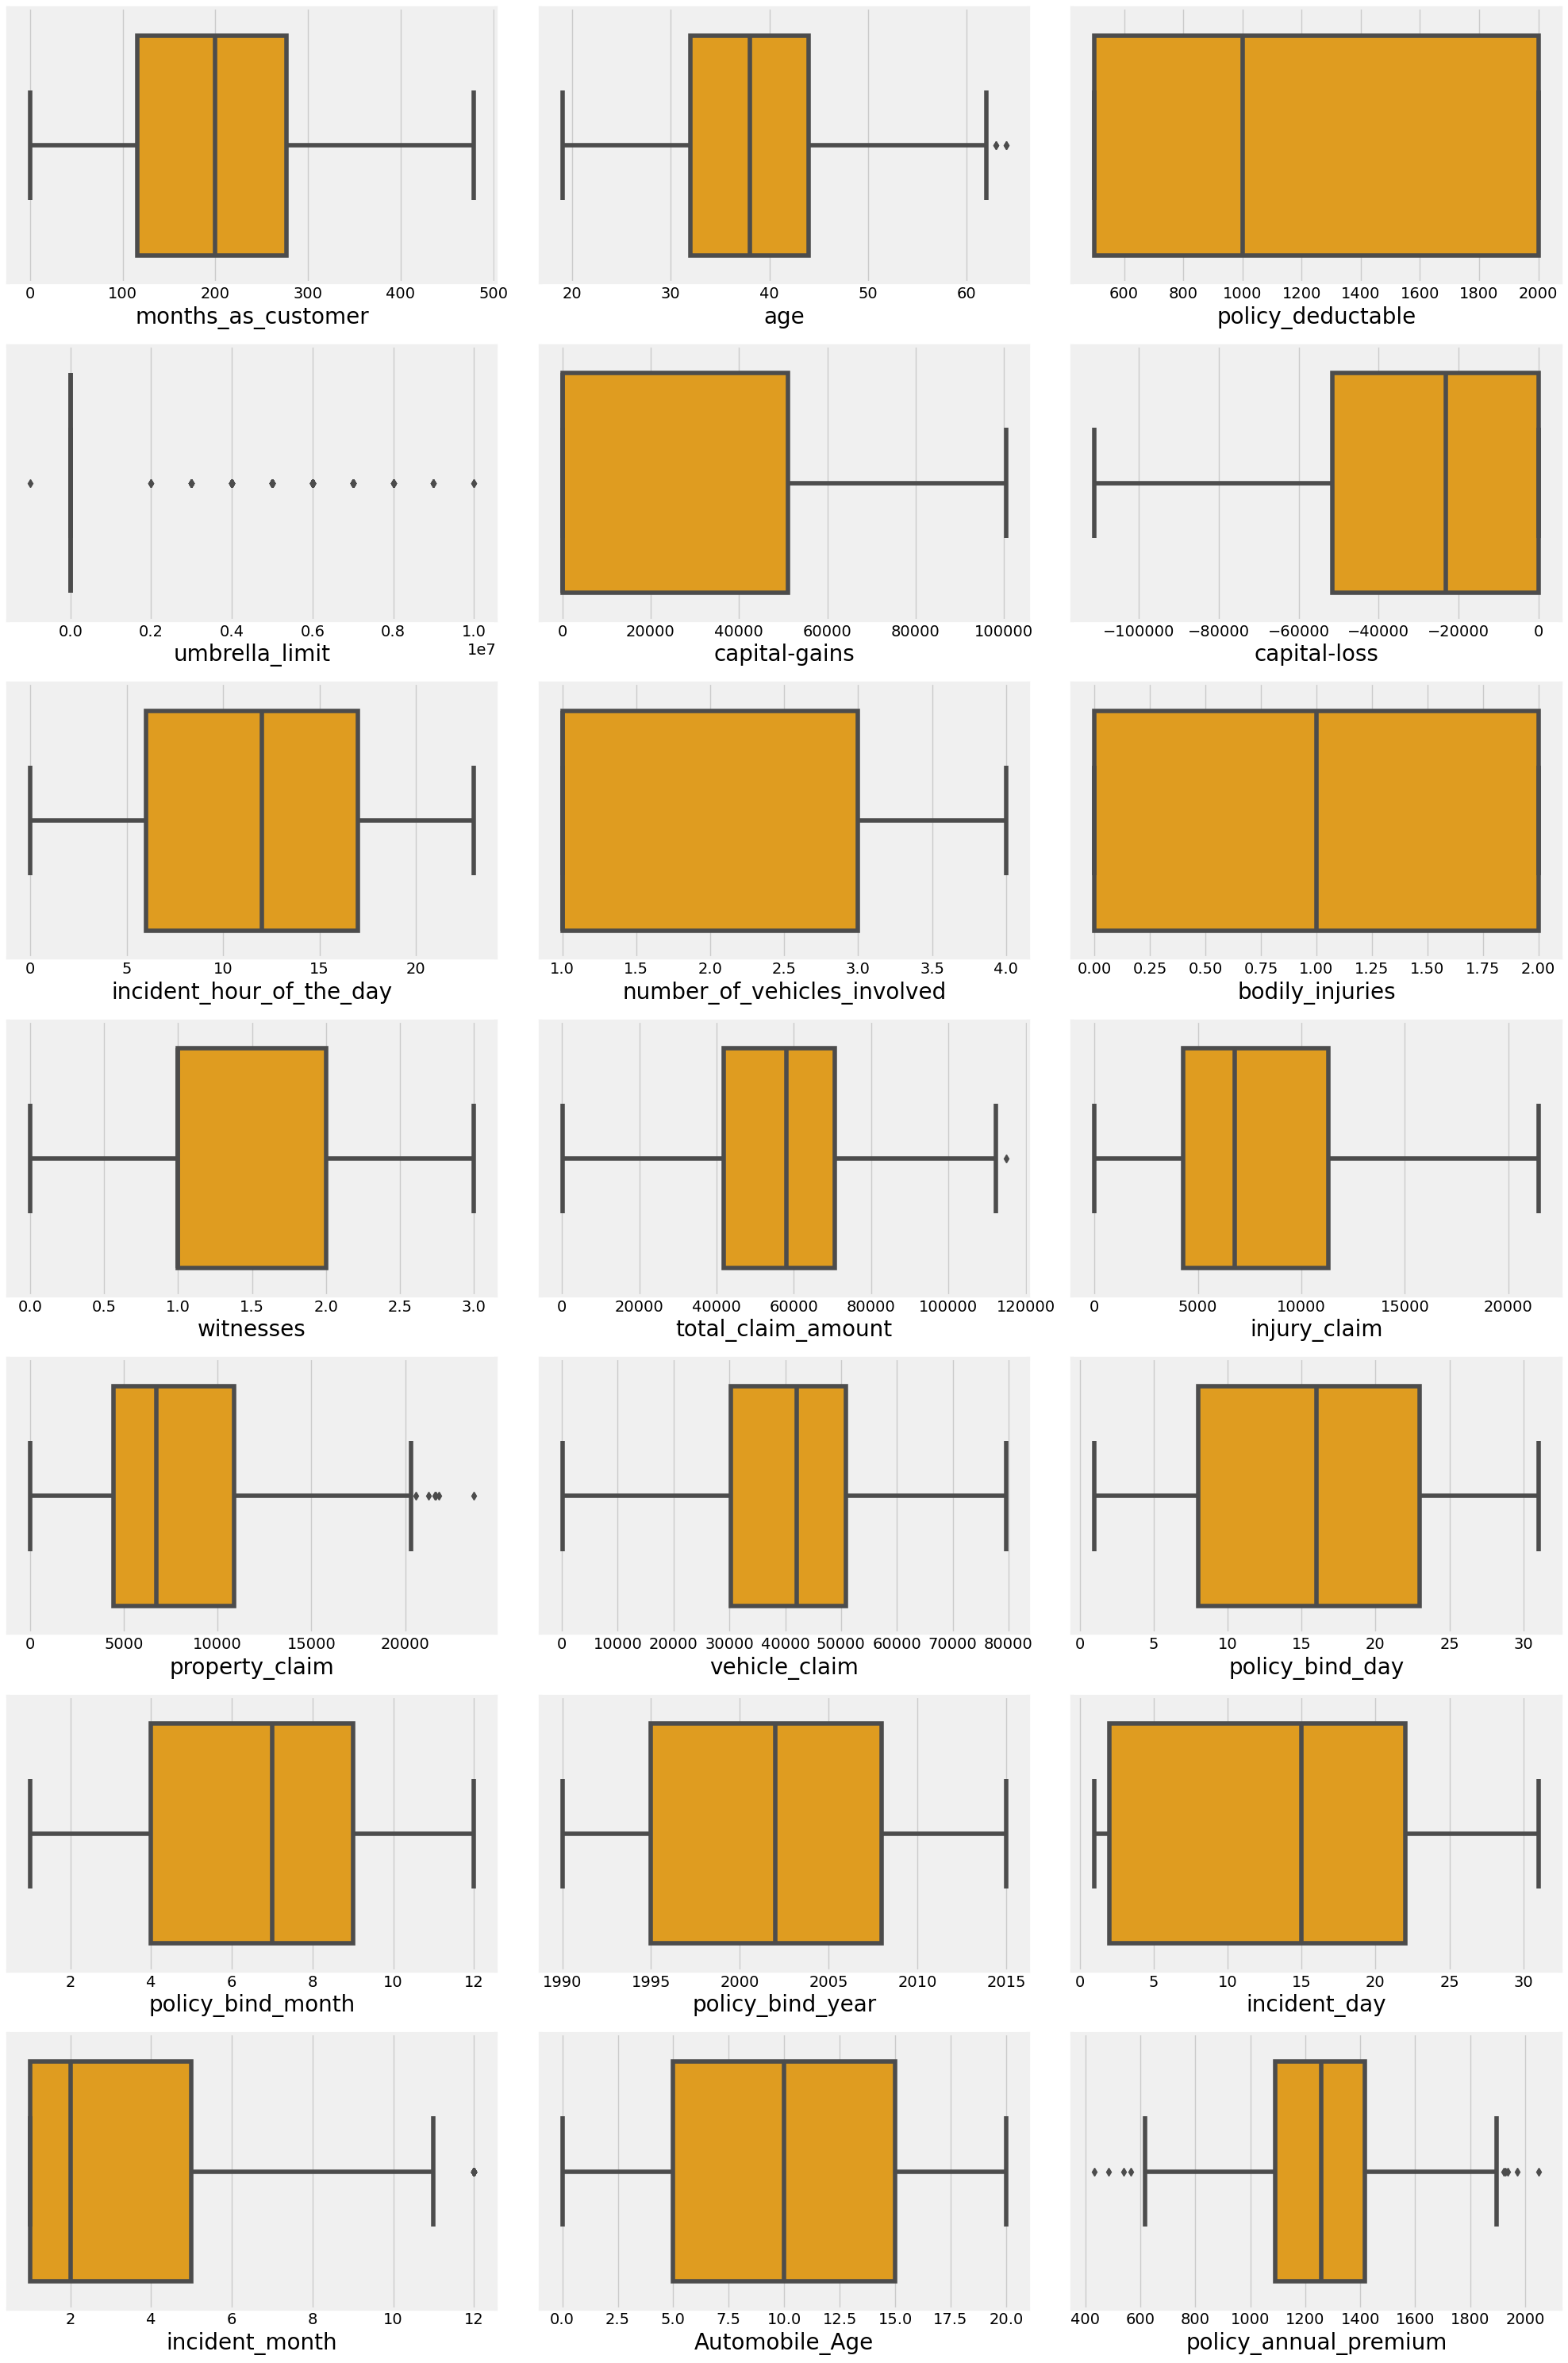

In [61]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Observation:
    
    As we can observe that there are outliners are present in the 'umbrella_limit','age','policy_annual_premium','property_claim'.
    so we are going to use Zscore method for removing outliners.

In [62]:
#Outliers removal using Zscore method

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


Hence the total data loss is 2%.

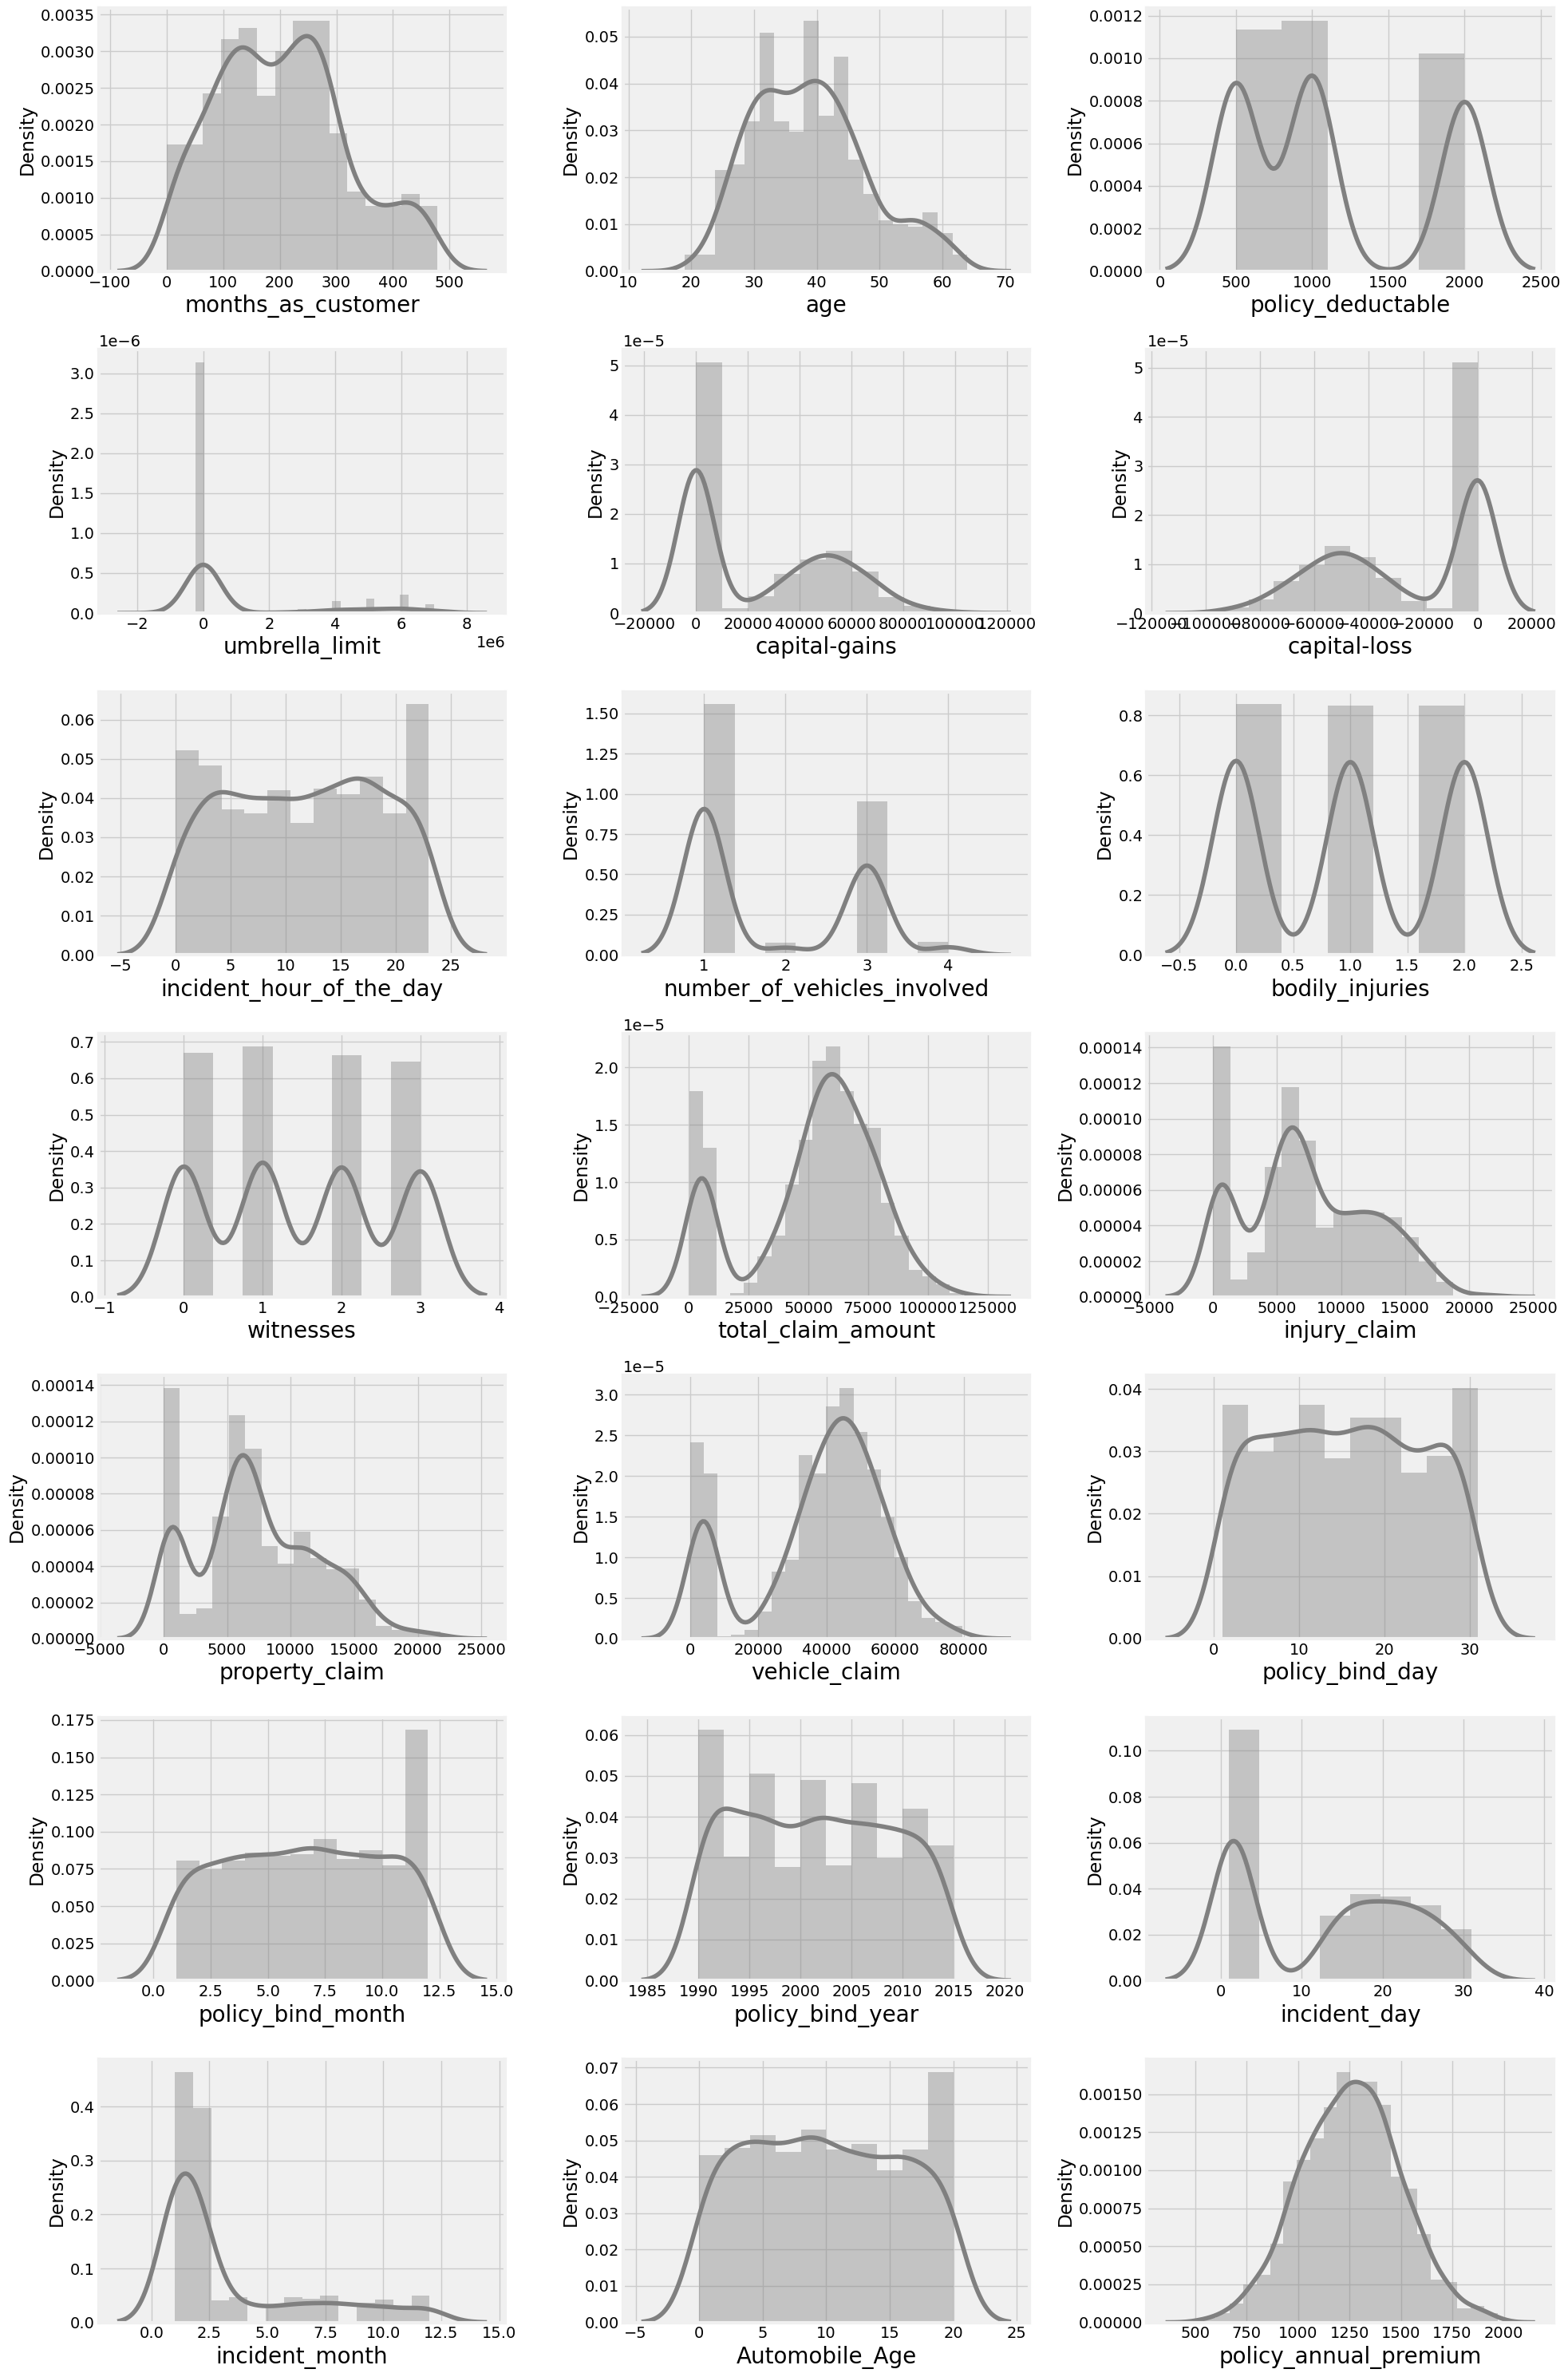

In [63]:
#lets check the skewness in features

plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=21:
        plt.subplot(7,3,plotnumber)
        sns.distplot(df[col],color = 'grey')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

There are skweness are presents in the few data.

In [64]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

The above mentioned characteristics, "vehicle_claim," "umbrella_limit," and "total_claim_amount," are continuous variables with skewed data. 'incident_month' is a skewed, discrete variable.Thus, ignore it.

In [65]:
skew=['total_claim_amount','vehicle_claim']


scaler = PowerTransformer(method='yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)

In [66]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

So it can not removed but reduced somewhat.

# Heatmap Corrleation

In [68]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.018213  0.013256     -0.010921   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.073031 -0.076325      0.049961   
incident_severity                     -0.064094 -0.064396     -0.028353   
authorities_contacted                  0.013782  0.018441     -0.014647   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
incident_hour_of_the_day               0.066198  0.083720      0.021926   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.000630 -0.008239     -0.013576   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.017200 -0.018135      0.065316   
total_claim_amount                     0.059338  0.068448     -0.015056   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.056360  0.059129     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
fraud_reported                         0.021285  0.013279      0.034587   
policy_bind_day                        0.050824  0.053147     -0.000583   
policy_bind_month                      0.004207  0.014492      0.073692   
policy_bind_year                      -0.041914 -0.031709     -0.003045   
incident_day                          -0.010538 -0.005843      0.016049   
incident_month                         0.019242  0.018221      0.027889   
Automobile_Age                        -0.000869 -0.005594      0.001160   
CSL_Personal                          -0.021855 -0.013323      0.001653   
CSL_Accidental                         0.007121  0.011258      0.029007   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_hobbies                      -0.001923              -0.014226   
insured_relationship                 -0.019000               0.004417   
capital-gains                         0.031673              -0.006807   
capi

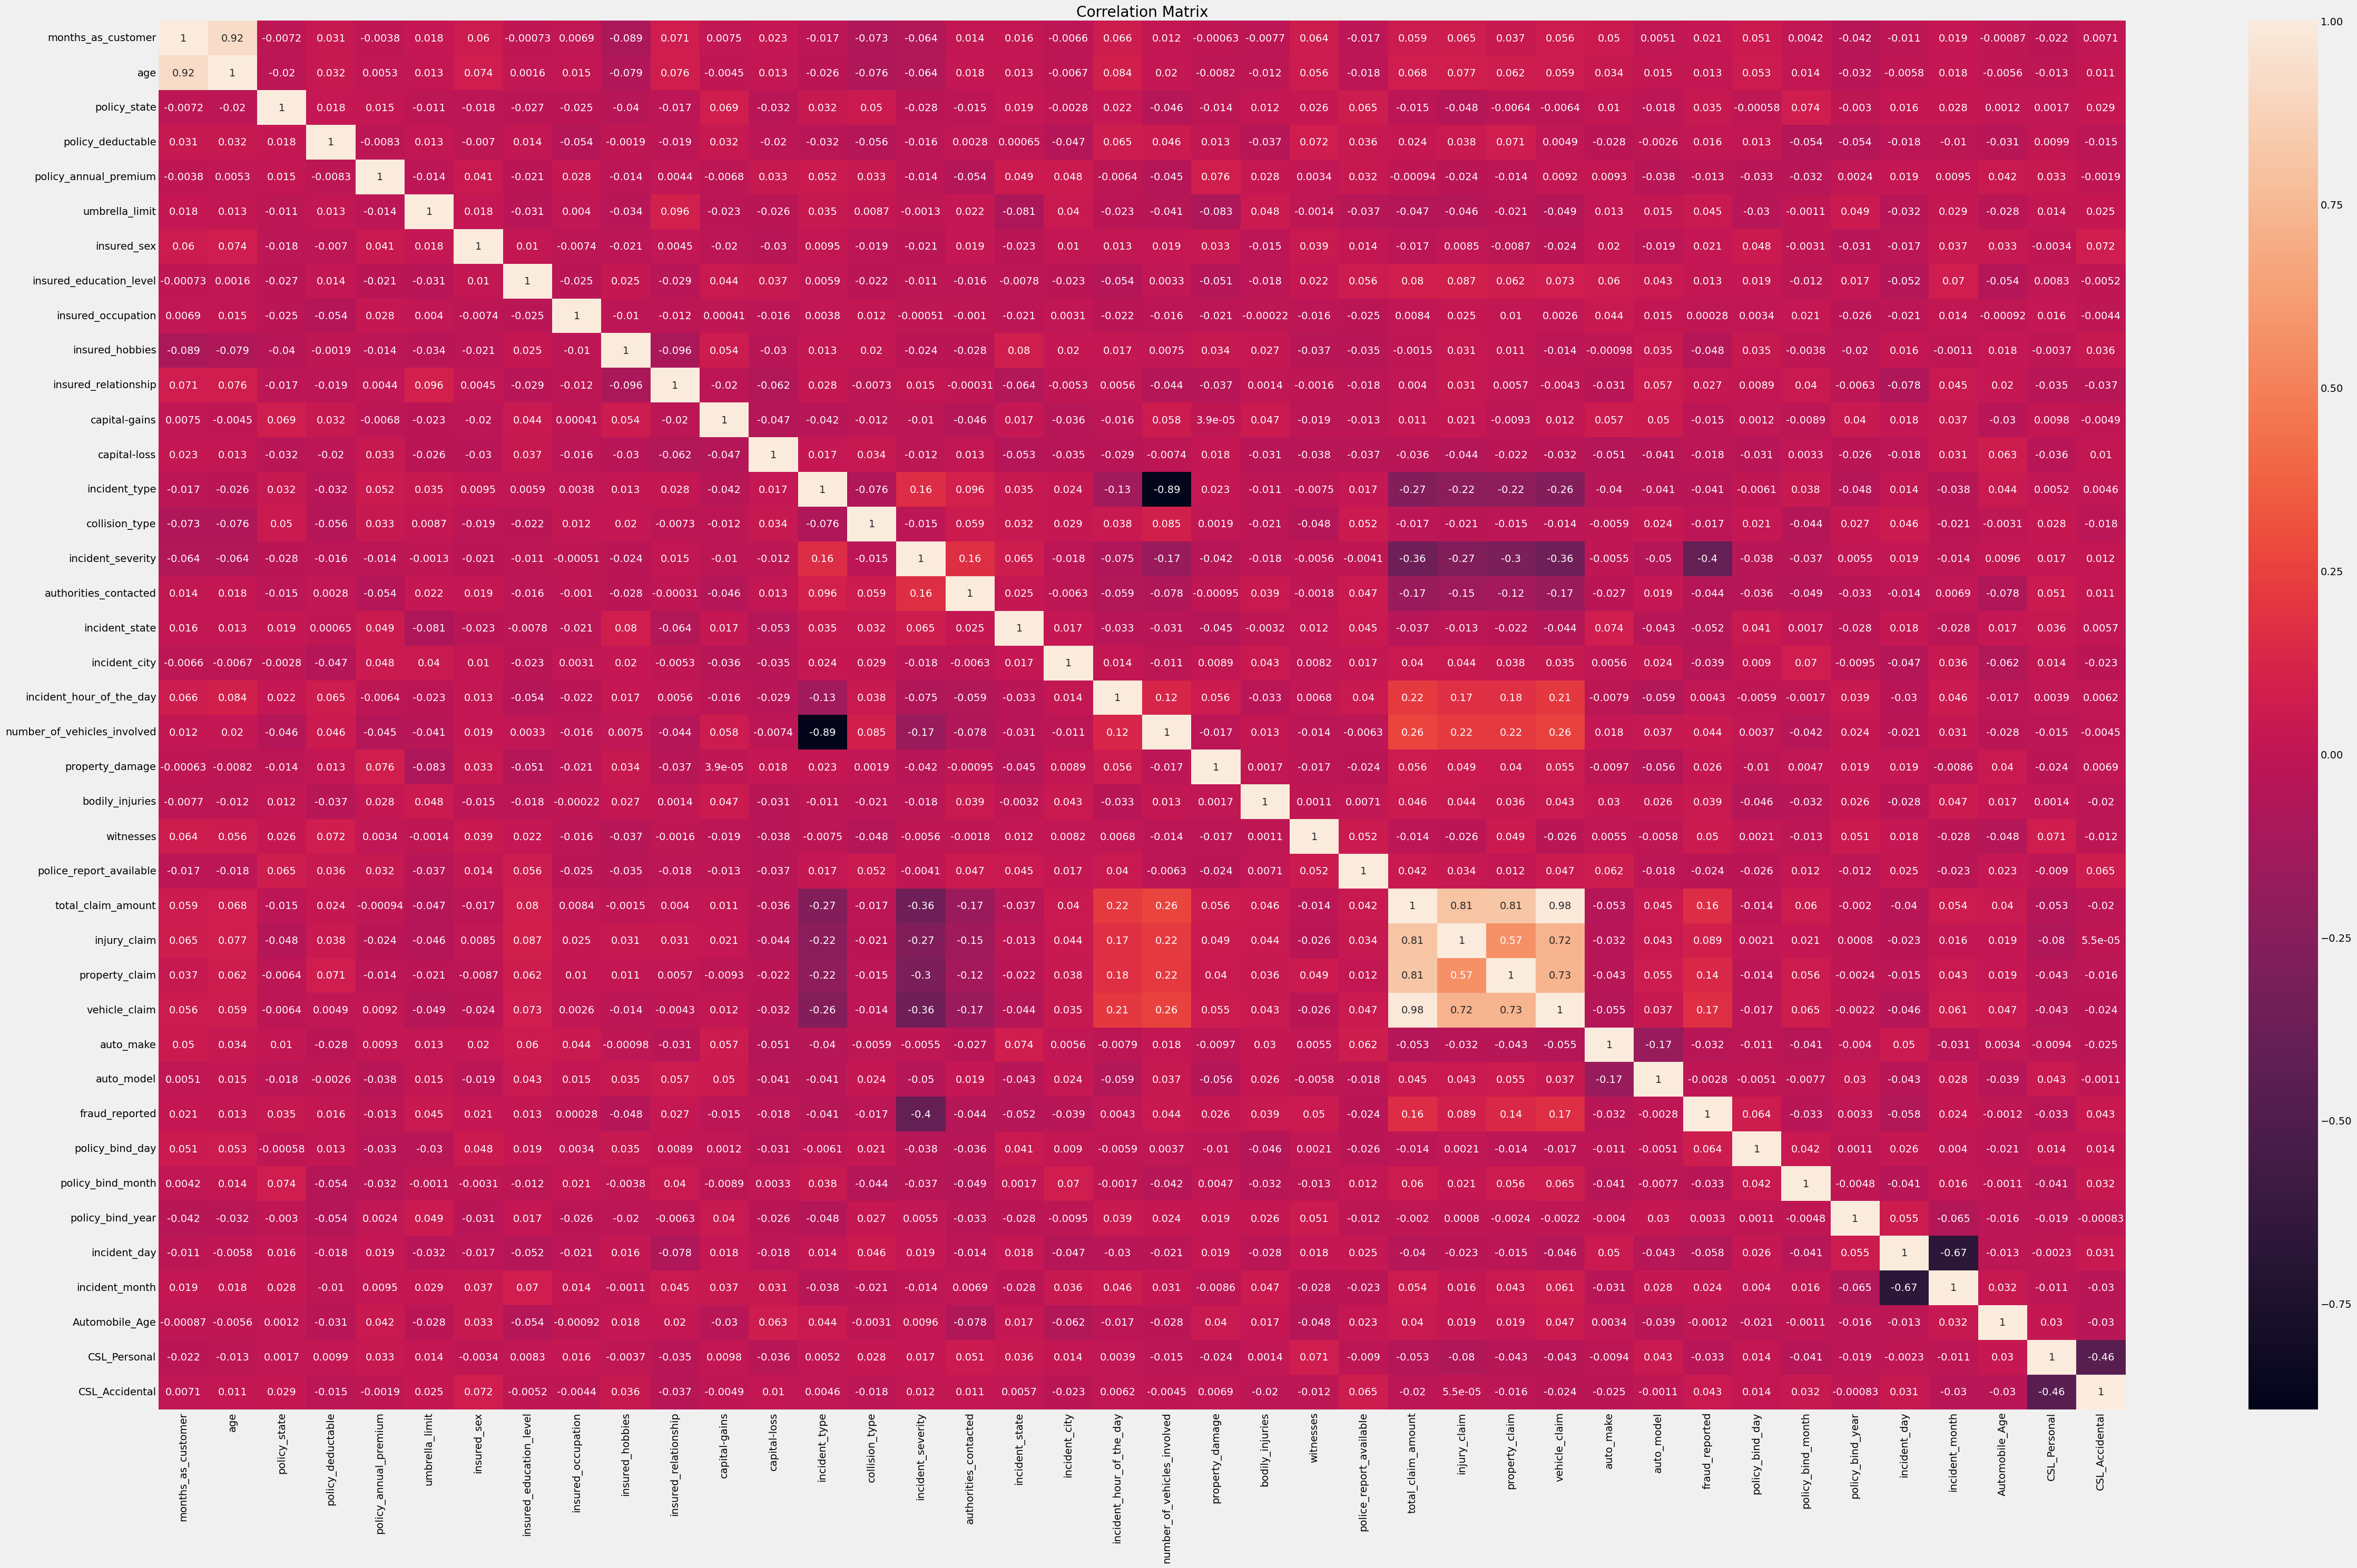

In [67]:
plt.figure(figsize = [50, 30])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

# Visualizing the correlation between Target and features using bar plot

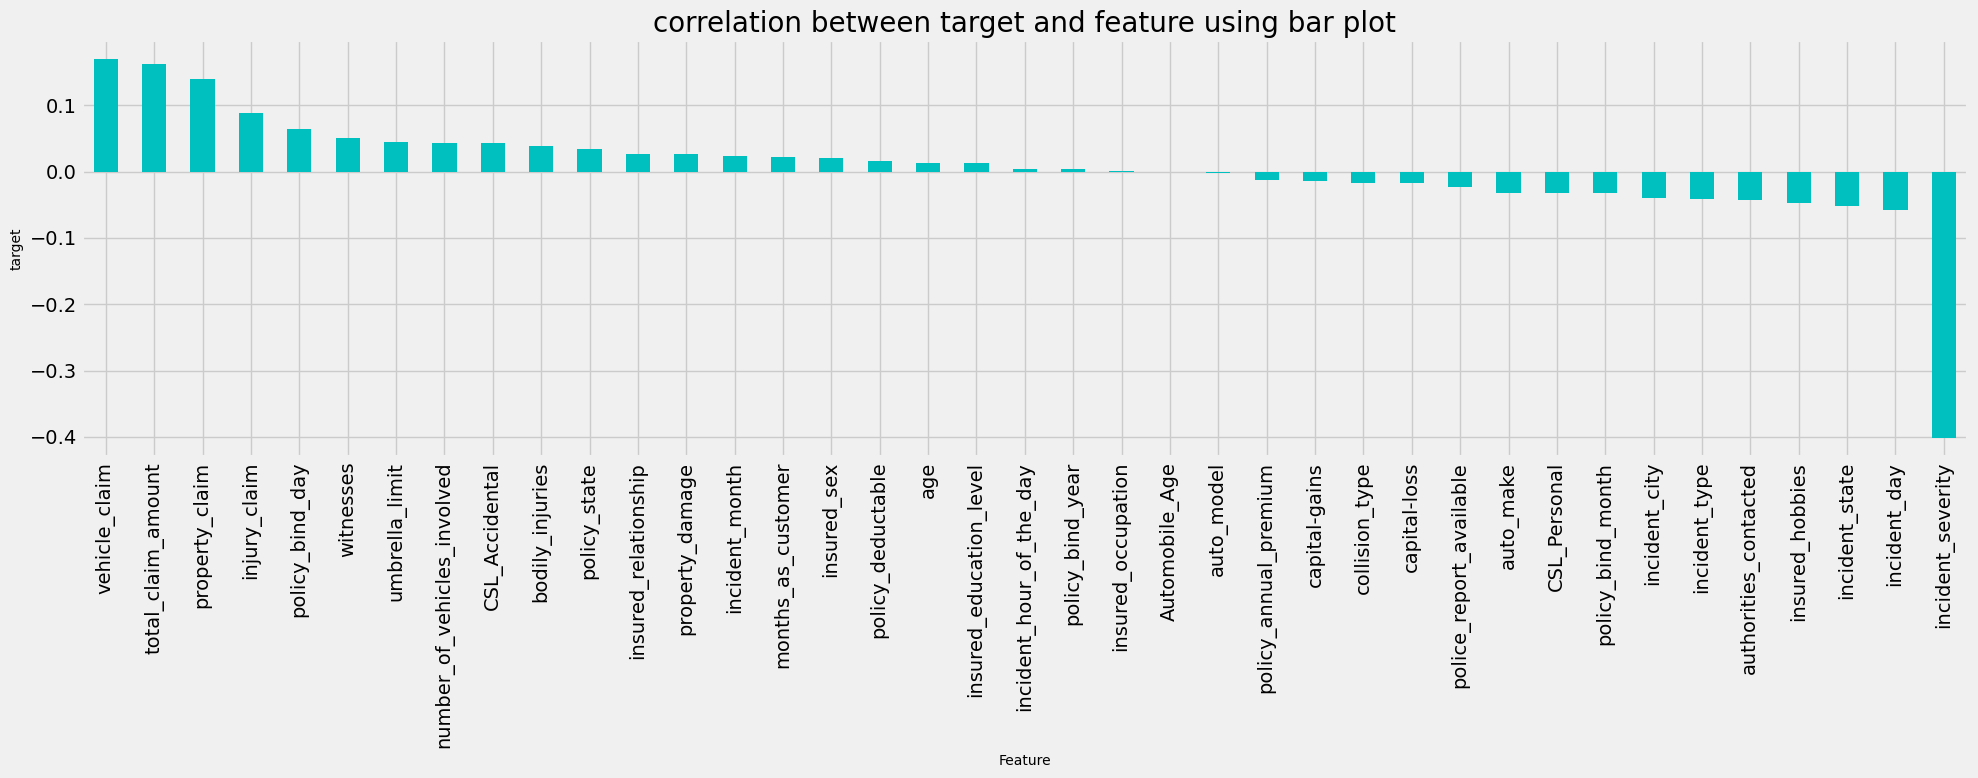

In [69]:
plt.figure(figsize=(20,8))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between target and feature using bar plot',fontsize=20)
plt.show()

Observation:
    
 With a correlation of 0.4, incident_severity is connected with the target variable. Other variables have a low correlation with the target variable.
Other variables have a low correlation with the target variable.

Injury_claim, property_claim, and vehicle_claim are all significantly connected.
The incident_hour_of_the_day is strongly inversely connected to the incident type.

# Balanceing Imbalanced target feature

In [70]:
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

as we know that fraud reported is our target variable so we have to balance the data.

In [71]:
# Splitting data in target and dependent feature
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [72]:
#using SMOTE for balancing the data
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [73]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Standard Scaling

In [74]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Checking Multicollinearity 

In [75]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       7.754824           months_as_customer
1       7.705656                          age
2       1.071082                 policy_state
3       1.059007            policy_deductable
4       1.042527        policy_annual_premium
5       1.052077               umbrella_limit
6       1.095354                  insured_sex
7       1.051703      insured_education_level
8       1.032467           insured_occupation
9       1.082641              insured_hobbies
10      1.064903         insured_relationship
11      1.070973                capital-gains
12      1.066219                 capital-loss
13      3.794569                incident_type
14      1.100875               collision_type
15      1.369499            incident_severity
16      1.120985        authorities_contacted
17      1.084769               incident_state
18      1.050373                incident_city
19      1.127746     incident_hour_of_the_day
20      3.677391  number_of_vehicles_involved
21      1.056245              property_damage
22      1.058452              bodily_injuries
23      1.072771                    witnesses
24      1.093301      police_report_available
25  41725.330627           total_claim_amount
26   1707.217544                 injury_claim
27   1609.921278               property_claim
28  20725.934834                vehicle_claim
29      1.078761                    auto_make
30      1.087245                   auto_model
31      1.039110              policy_bind_day
32      1.051335            policy_bind_month
33      1.042205             policy_bind_year
34      1.849228                 incident_day
35      1.847363               incident_month
36      1.056265               Automobile_Age
37      1.223748                 CSL_Personal
38      1.186975               CSL_Accidental

Eliminating a few characteristics that have a strong correlation. However, this won't work in this case because the majority of the input attributes have weak or moderate correlations with one another.
Another method of addressing multicollinearity is to use PCA after scaling data.As we know that VIF is exceed permissible limit of 10 so we will go with PCA.

# PCA

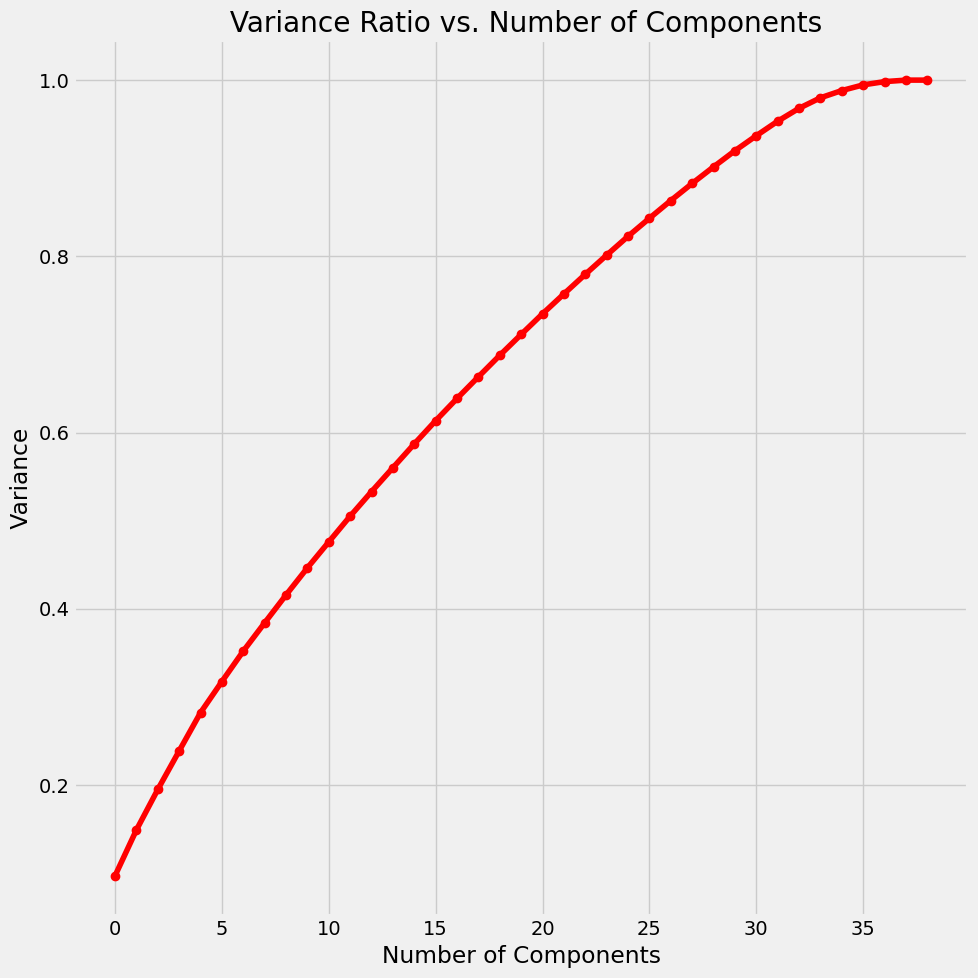

In [76]:
pca = PCA()
x_pca = pca.fit_transform(X_scale)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel(' Variance ')
plt.title(' Variance Ratio vs. Number of Components')
plt.grid(True)

Observation:
    
    It is evident that 90% of the variance in the data can be attributed to the 28 major components. The first 28 components will be chosen for our prediction.

In [77]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [78]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector size: (1036,)
Test feature matrix size: (444, 28)
Test target vector size: (444,)


In [80]:
#Finding best Random state
maxAccu = 0
maxRS = 0

for i in range(1, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, test_size=0.3, random_state=i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print('Best accuracy is', maxAccu, 'on Random_state', maxRS)


Best accuracy is 0.8108108108108109 on Random_state 22


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=22, test_size=.3)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

print('\033[1m' + 'Logistic Regression Evaluation' + '\033[0m\n')
print(f'\033[1mAccuracy Score of Logistic Regression:\033[0m {accuracy_score(Y_test, y_pred)}\n')
print(f'\033[1mConfusion matrix of Logistic Regression:\033[0m\n{confusion_matrix(Y_test, y_pred)}\n')
print(f'\033[1mClassification Report of Logistic Regression:\033[0m\n{classification_report(Y_test, y_pred)}')


Logistic Regression Evaluation

Accuracy Score of Logistic Regression: 0.8108108108108109

Confusion matrix of Logistic Regression:
[[173  47]
 [ 37 187]]

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       220
           1       0.80      0.83      0.82       224

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444



In [82]:
#Finding Optimal value of n_neighbors for KNN

In [83]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4722001408015175
RMSE value for k=  2 is: 0.4323620438208434
RMSE value for k=  3 is: 0.5111372235136679
RMSE value for k=  4 is: 0.483977514182461
RMSE value for k=  5 is: 0.5263335701121742
RMSE value for k=  6 is: 0.5067117097095317
RMSE value for k=  7 is: 0.5431804903022982
RMSE value for k=  8 is: 0.5155247479663472
RMSE value for k=  9 is: 0.5452497568062706
RMSE value for k=  10 is: 0.5390181263561927
RMSE value for k=  11 is: 0.5534494613840601
RMSE value for k=  12 is: 0.5390181263561927
RMSE value for k=  13 is: 0.5514109665703558
RMSE value for k=  14 is: 0.5452497568062706
RMSE value for k=  15 is: 0.5514109665703558
RMSE value for k=  16 is: 0.5411033106466757
RMSE value for k=  17 is: 0.5615294429638711
RMSE value for k=  18 is: 0.5554804754071547
RMSE value for k=  19 is: 0.5714687888035326
RMSE value for k=  20 is: 0.5554804754071547


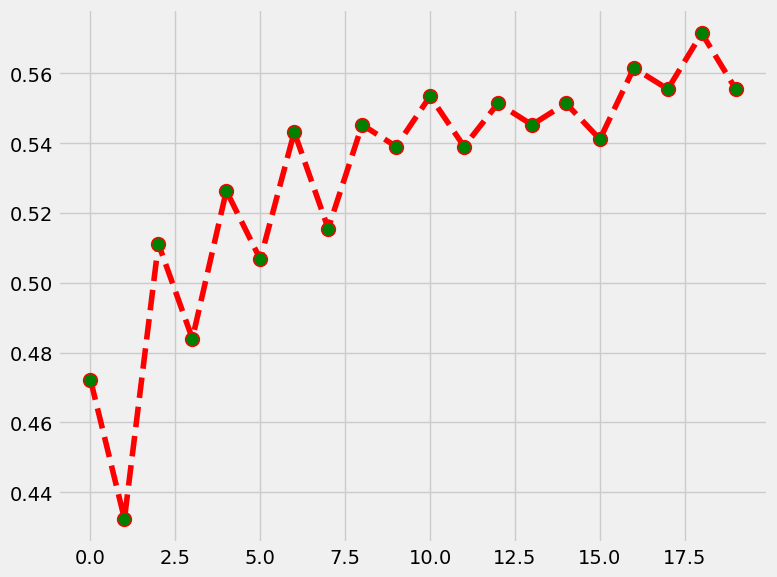

In [84]:
#plotting the RMSE values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

RMSE value for k=  2 is: 0.4323620438208434. we get the minimum RMSE.It is safe to state that in this instance, k=2 will provide the optimal outcome.

# Applying other classification algorithm

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8108108108108109


Confusion matrix : 
 [[173  47]
 [ 37 187]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       220
           1       0.80      0.83      0.82       224

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444





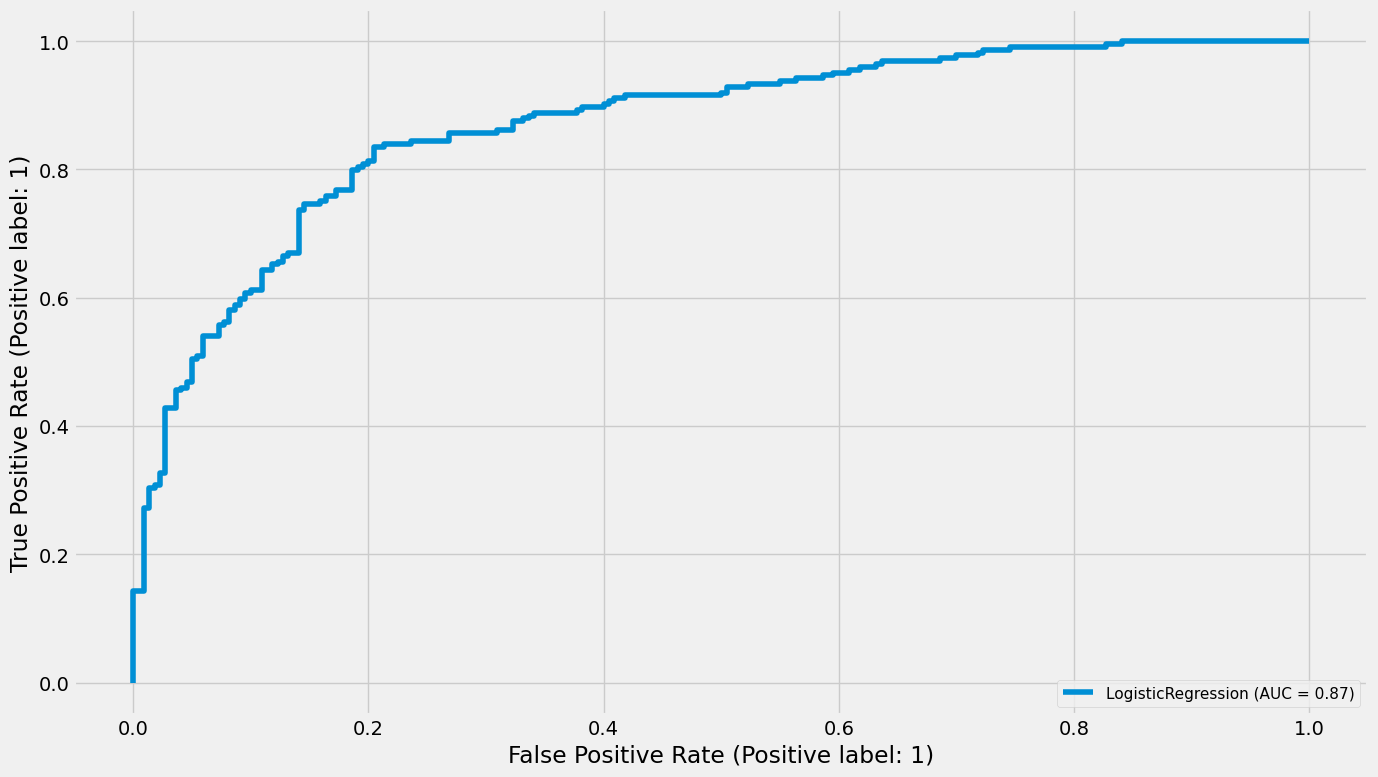

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8378378378378378


Confusion matrix : 
 [[189  31]
 [ 41 183]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       220
           1       0.86      0.82      0.84       224

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84       444





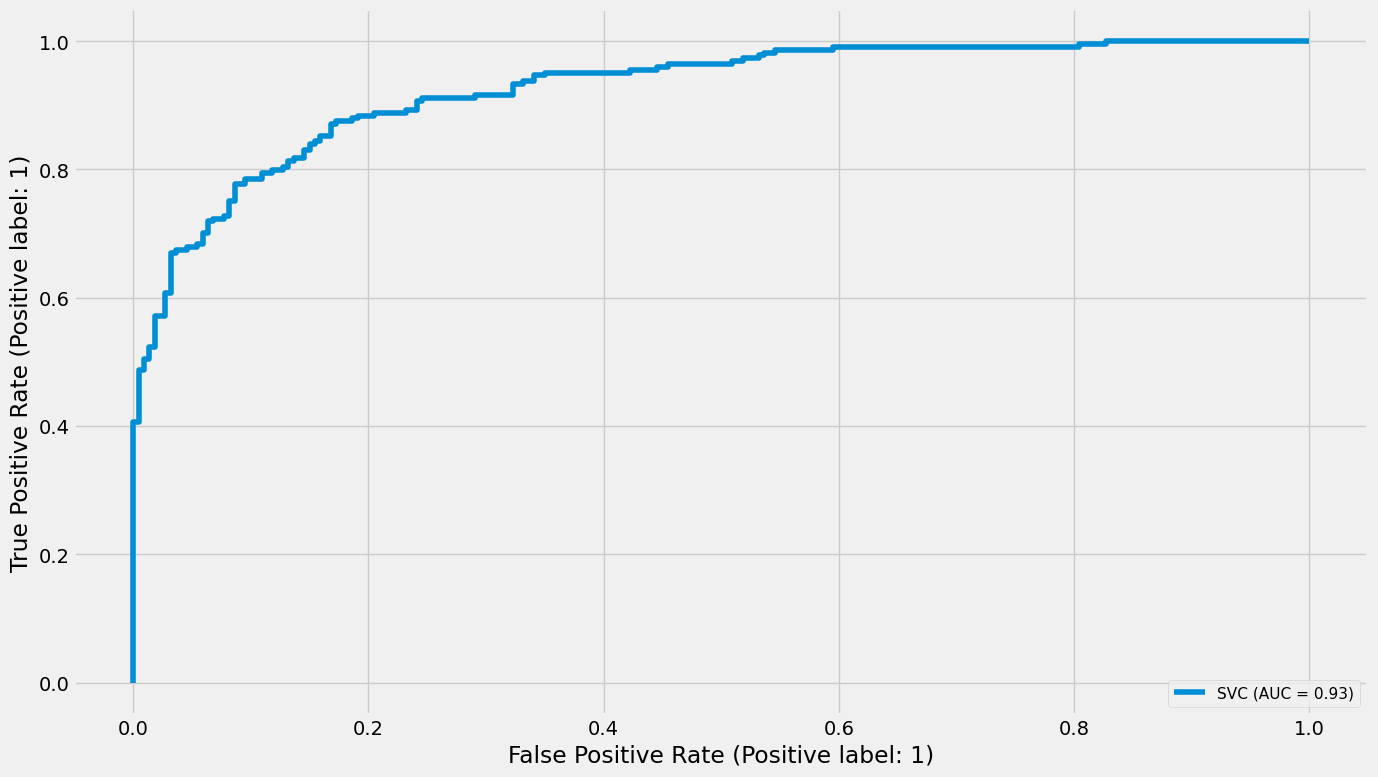

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.6959459459459459


Confusion matrix : 
 [[141  79]
 [ 56 168]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.64      0.68       220
           1       0.68      0.75      0.71       224

    accuracy                           0.70       444
   macro avg       0.70      0.70      0.69       444
weighted avg       0.70      0.70      0.69       444





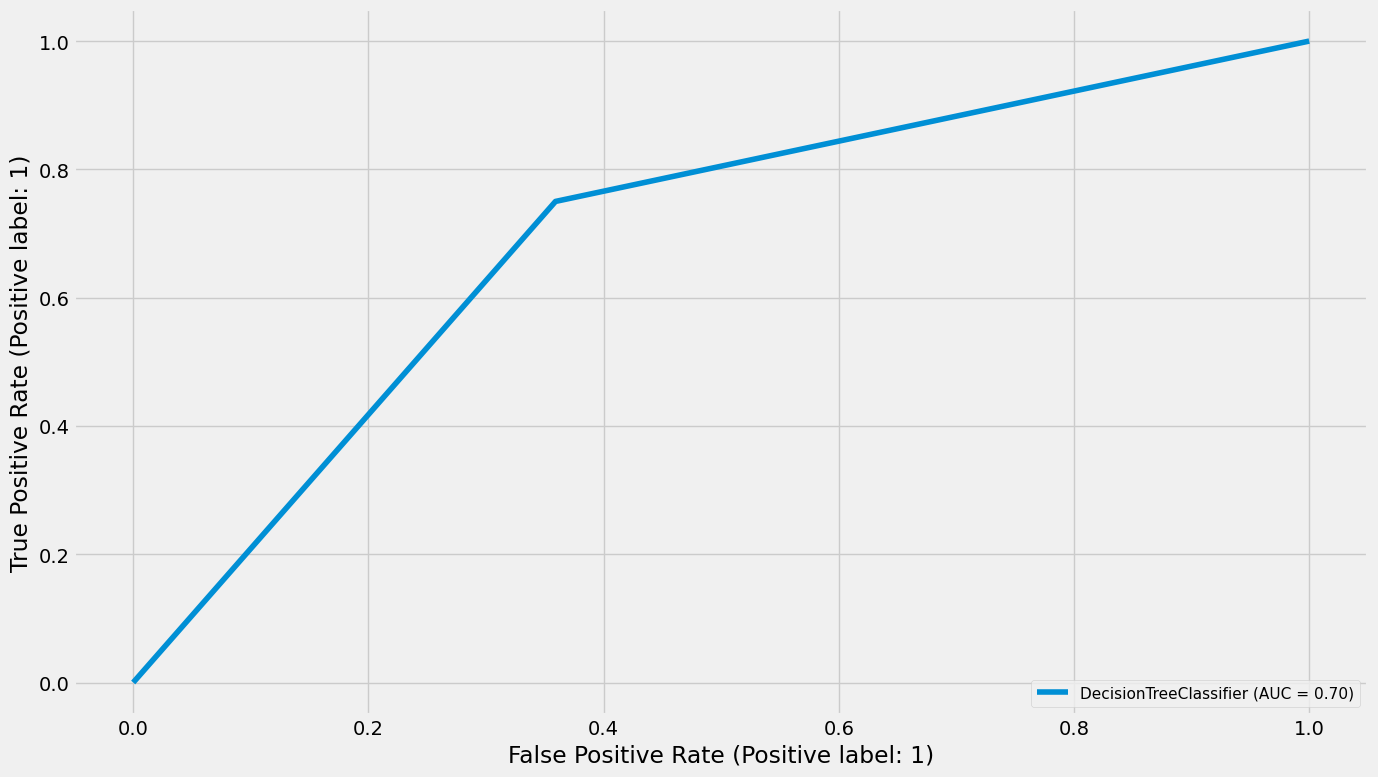

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=2) is


Accuracy Score :
 0.8130630630630631


Confusion matrix : 
 [[159  61]
 [ 22 202]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       220
           1       0.77      0.90      0.83       224

    accuracy                           0.81       444
   macro avg       0.82      0.81      0.81       444
weighted avg       0.82      0.81      0.81       444





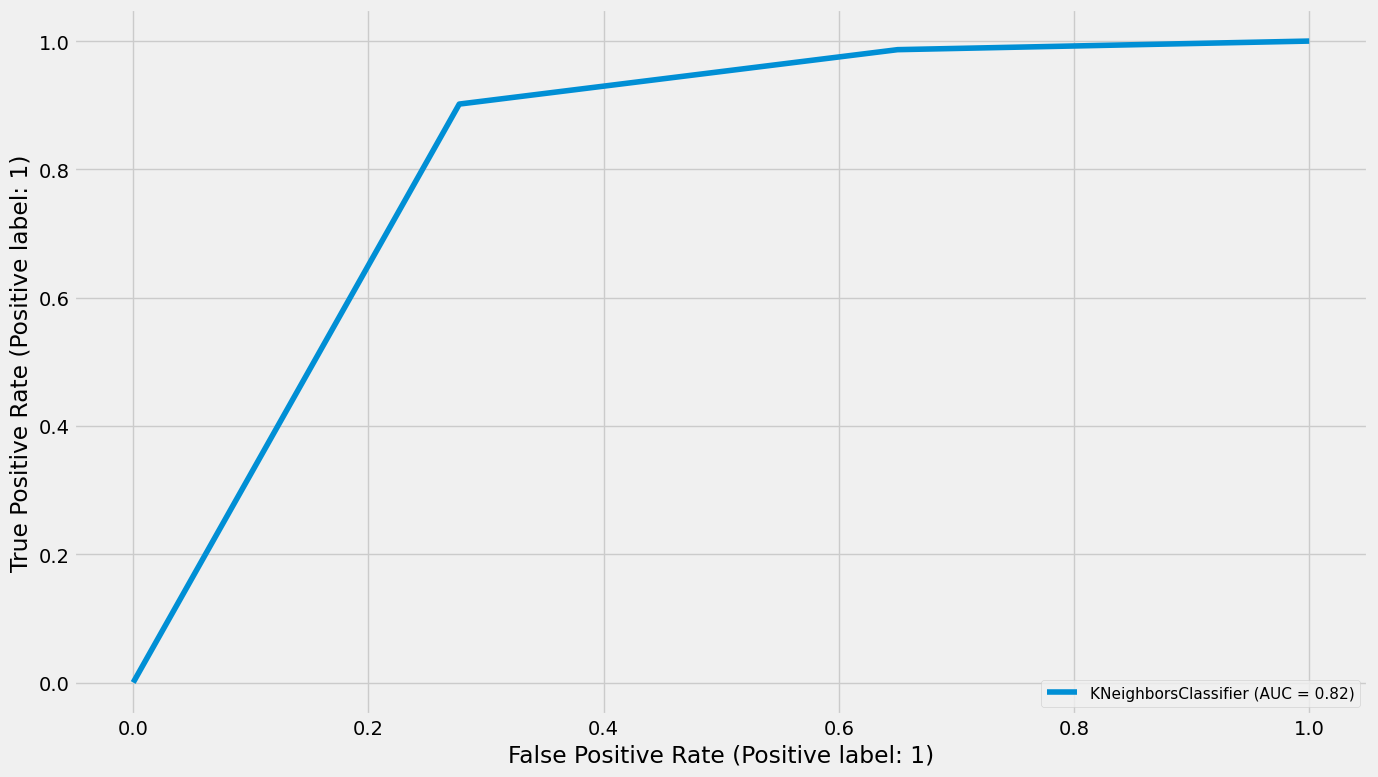

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8040540540540541


Confusion matrix : 
 [[188  32]
 [ 55 169]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       220
           1       0.84      0.75      0.80       224

    accuracy                           0.80       444
   macro avg       0.81      0.80      0.80       444
weighted avg       0.81      0.80      0.80       444





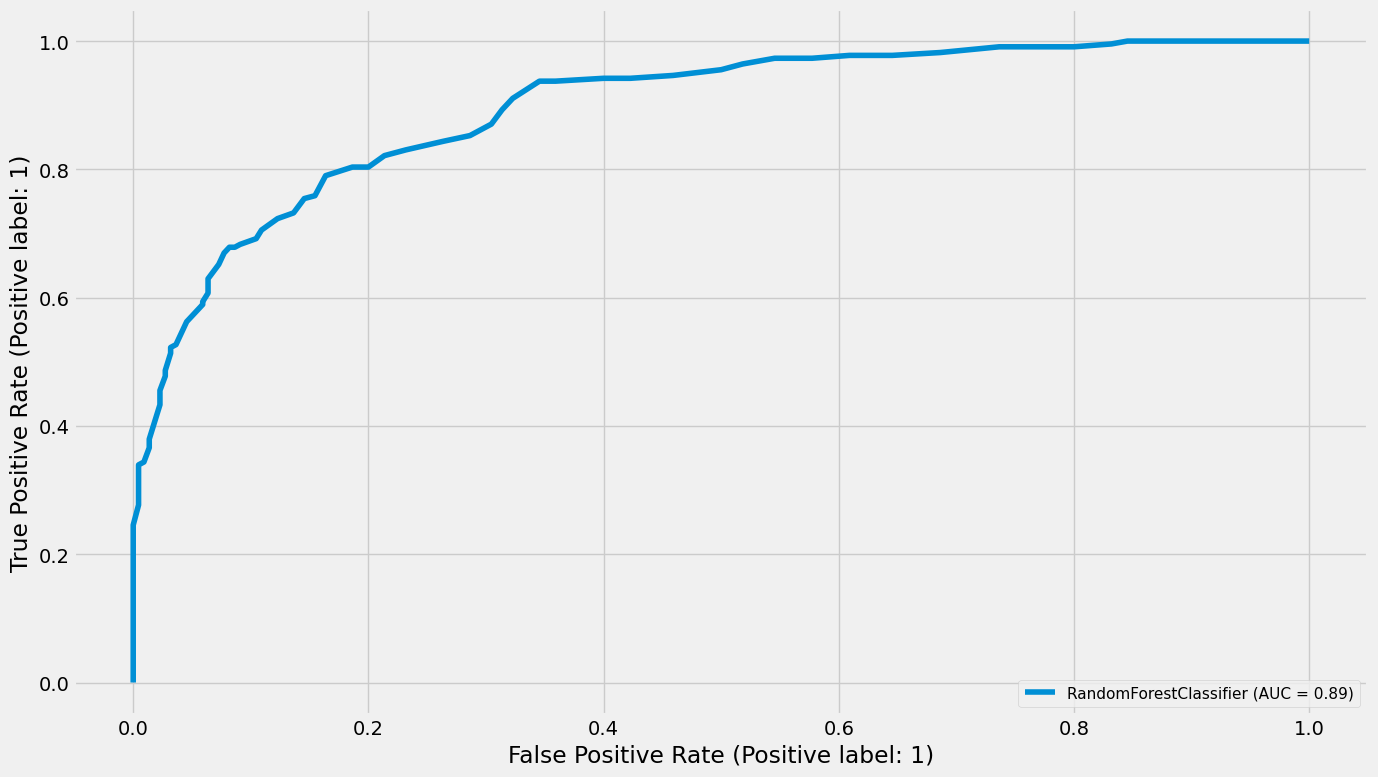

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8445945945945946


Confusion matrix : 
 [[191  29]
 [ 40 184]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       220
           1       0.86      0.82      0.84       224

    accuracy                           0.84       444
   macro avg       0.85      0.84      0.84       444
weighted avg       0.85      0.84      0.84       444





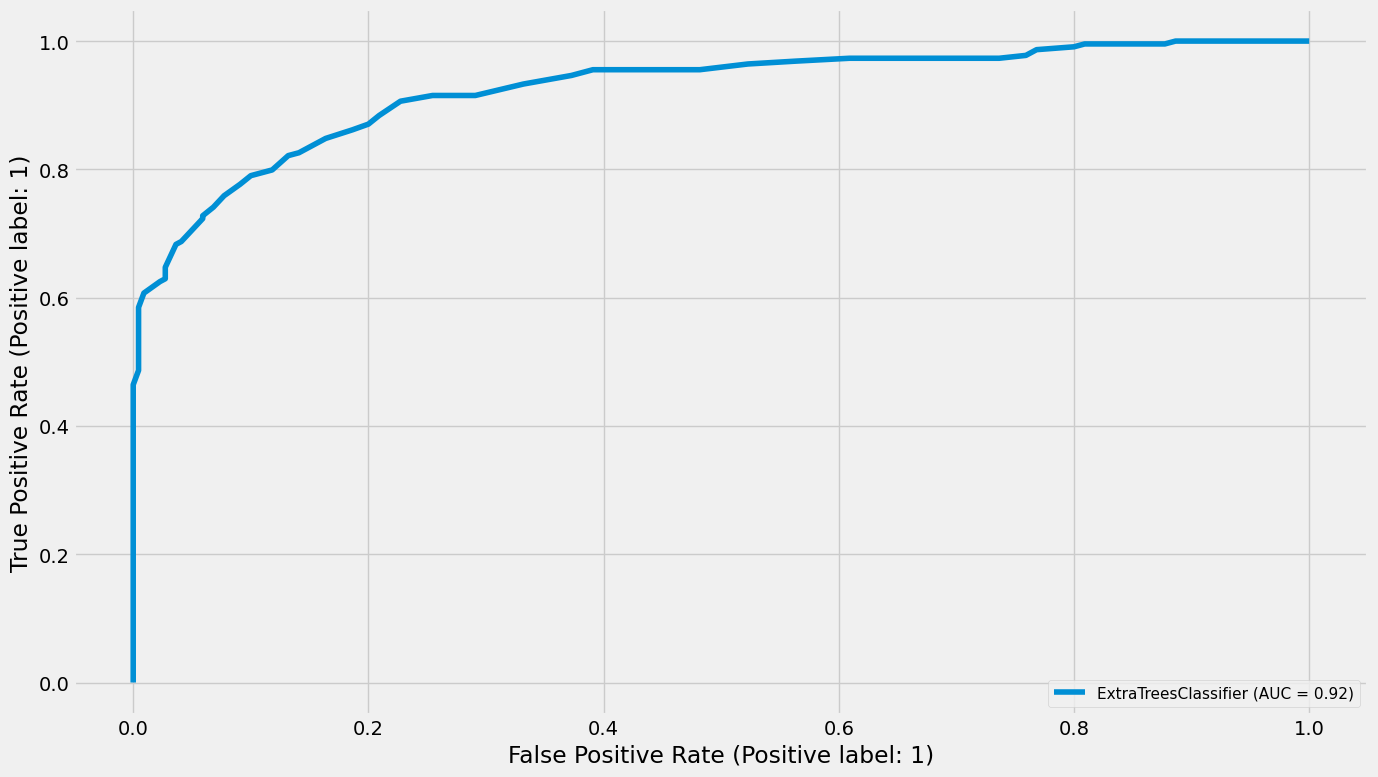

In [85]:
model=[ LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('=================================================')

# CrossValidation 

In [86]:
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================')



Cross Validation Score LogisticRegression() :

Score : [0.60135135 0.69594595 0.80067568 0.81756757 0.875     ]
Mean Score : 0.758108108108108
Std deviation : 0.09741453147397285




Cross Validation Score SVC() :

Score : [0.56081081 0.72972973 0.88851351 0.90540541 0.93581081]
Mean Score : 0.8040540540540541
Std deviation : 0.1410366762468169




Cross Validation Score DecisionTreeClassifier() :

Score : [0.59121622 0.63851351 0.73648649 0.74324324 0.76689189]
Mean Score : 0.6952702702702703
Std deviation : 0.06808585007384114




Cross Validation Score KNeighborsClassifier(n_neighbors=2) :

Score : [0.76689189 0.79391892 0.84459459 0.86486486 0.86486486]
Mean Score : 0.827027027027027
Std deviation : 0.039709960148419245




Cross Validation Score RandomForestClassifier() :

Score : [0.57094595 0.72635135 0.88513514 0.86824324 0.91891892]
Mean Score : 0.7939189189189189
Std deviation : 0.12942320205471258




Cross Validation Score ExtraTreesClassifier() :

Score : [0.63175676 0.7


As we can see, ExtraTreesClassifier() provides the best Cross-validation score, largest f1 score, and good accuracy. We will use the ExtraTreesClassifier model as our final model after applying hyperparameter adjustment.

# Hyper Parameter Tuning : GridSearchCV

In [87]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [88]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameter, verbose=10)
GCV.fit(X_train, Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.817 total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.773 total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.778 total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [89]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 400}

In [100]:
Finalclaimfraud_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 400, max_depth=30 ,min_samples_split= 3, max_features= 'sqrt')
Finalclaimfraud_mod.fit(X_train,Y_train)
y_pred=Finalclaimfraud_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

# Print confusion matrix
print('\033[1m'+'Confusion Matrix for the Final Model :'+'\033[0m \n', confusion_matrix(Y_test, y_pred_final))





Accuracy Score :
 0.8423423423423423
Confusion Matrix for the Final Model : 
 [[190  30]
 [ 45 179]]


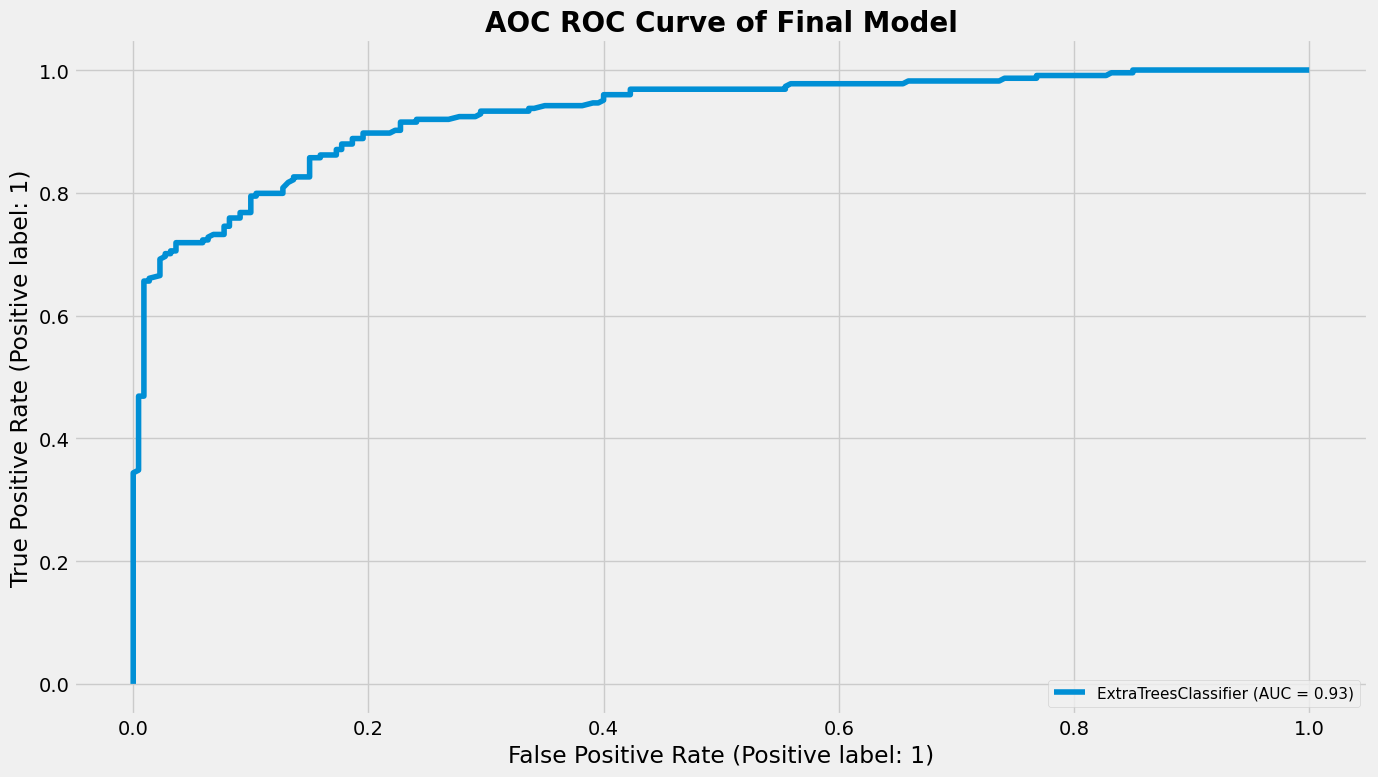

Auc Score :
 0.8424918831168833


In [101]:
disp = plot_roc_curve(Finalclaimfraud_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Finalclaimfraud_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [102]:
joblib.dump(Finalclaimfraud_mod,'Insurance_claim_Final.pkl')

['Insurance_claim_Final.pkl']